# Plano de aula 
Faremos uma aula prática com um cilco fim a fim de tudo que aprendemos até aqui. 
Organizamos a atividade em passos claros. Cada passo terá um tempo para execução. Ao final do tempo, será compartilhada a solução daquele passo. O objetivo é que a turma toda possa experimentar o processo decisório de cada passo  com a mesma base de conclusões
Esse notebook já possui células de código configuradas para carga automática do da solução. O código segue o padrão: <br>
```python 
%load solucaoX.X.py  
```

Para ter a solução do passo, apague o caracter de comentário `#` e execute a célula duas vezes: a primeira para carregar a solução, a 2a para efetivamente executar a solução.
Pratique na célula a seguir essa dinâmica.

In [1]:
# %load solucao_treino.py

## Etapas - 1a aula
    
- (05 min): Introdução
- (05 min): Planejamento (aluno)
- (05 min): Solução proposta
- (20 min): Exploração inicial
- (10 min): Solução proposta
- (15 min): Conclusões iniciais
- (15 min): Solução proposta
- (10 min): Intervalo
- (30 min): Exploração secundária
- (20 min): Solução proposta / questão do aluno
- Para casa: planejar os tempos para os próximos passos que serão realizados na próxima aula
    
## Etapas - 2a aula

- TBD

# Introdução do caso

<br>
<img src="./img/house_price.png" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas do Condado de King, no estado de Washington, EUA. O condado é composto por várias cidades, sendo Seattle a mais importante.

    -> Identificar como a base foi construida
    -> Devemos nos preocupar os com outliers?
    -> Ao analisar como as variáveis estão distribuidas, temos funções conhecidas?
    -> Como as funções se correlacionam, os comportamentos são os previstos?
    -> Para estudar a correlação parcial com regressões precisamos mudar a forma dos dados?
    -> Variáveis dummies, quando usa-las
    -> Iterando váriaveis
    -> Gerando predições
    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

O dataset foi simplificado para a aula (algumas features foram excluídas). Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

--------------

# Aula 1 - EDA

## Importando os pacotes

In [2]:
# %load solucao3.1.py
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Leitura dos dados

In [3]:
# %load solucao3.2.py
# lendo o arquivo e armazenando os dados em um DataFrame a partir do DropBox
%time house_prices = pd.read_csv("./data/house_pricing_test.csv",delimiter=',')
house_prices.head()

CPU times: user 7.38 ms, sys: 0 ns, total: 7.38 ms
Wall time: 14.3 ms


price  num_bed  num_bath  size_house  size_lot  num_floors  \
0   239000        3       1.0        1510     15022         1.0   
1  1260000        3       3.5        3220      3960         2.0   
2   414500        3       1.0        1050      6002         1.0   
3   252500        3       2.5        1780      7192         1.0   
4   389000        3       1.0        1330      3740         1.5   

   is_waterfront  condition  size_basement  year_built  renovation_date  \
0              0          3              0        1962                0   
1              0          3            460        1991                0   
2              0          3            210        1941                0   
3              0          4            530        1974                0   
4              0          3              0        1903                0   

     zip   latitude   longitude  avg_size_neighbor_houses  \
0  98003  47.330433 -122.303609                      1510   
1  98116  47.590933 -122.384230                      3080   
2  98115  47.698761 -122.316010                      1180   
3  98031  47.409319 -122.173484                      1870   
4  98118  47.550242 -122.274232                      1330   

   avg_size_neighbor_lot  
0                  12970  
1                   4444  
2                   6003  
3                   8500  
4                   5053

## EDA

### Planejamento
(05 min): Escreva um texto detalhando o que planeja fazer para descrever os dados. Não descreva as funções e sim que tipo de informação você quer obter sobre os dados.

In [4]:
# %load solucao3.3.1.py
# Gostaria de entender as seguintes informações sobre o dataset:
# 01. quantidade de linhas, quantidade de colunas
# 02. Titulo das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?)
# 03. Tipo dos dados, não apenas se são numéricas ou texto. O que elas são de fato. São numéricas mas deveriam ser categorias ou datetime?
# 04. Visão geral dos valores que as variáveis podem assumir
# 05. Como as variáveis estão distribuídas?

### Análise exploratória inicial
(25 min): Escreva o codigo para realizar o que planejou. procure fazer primeiro os codigos mais simples, mais objetivos, os que vierem primeiro a cabeça.


In [5]:
# %load solucao3.3.2.py
print(house_prices.shape)
display(house_prices.info(),house_prices.describe().T)

(1845, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1845 non-null   int64  
 1   num_bed                   1845 non-null   int64  
 2   num_bath                  1845 non-null   float64
 3   size_house                1845 non-null   int64  
 4   size_lot                  1845 non-null   int64  
 5   num_floors                1845 non-null   float64
 6   is_waterfront             1845 non-null   int64  
 7   condition                 1845 non-null   int64  
 8   size_basement             1845 non-null   int64  
 9   year_built                1845 non-null   int64  
 10  renovation_date           1845 non-null   int64  
 11  zip                       1845 non-null   int64  
 12  latitude                  1845 non-null   float64
 13  longitude                 1845 non-null   float64
 1

None

count           mean            std           min  \
price                     1845.0  557127.039024  403208.183409  81000.000000   
num_bed                   1845.0       3.379946       0.939221      0.000000   
num_bath                  1845.0       2.140108       0.785074      0.000000   
size_house                1845.0    2128.444986     955.754345    410.000000   
size_lot                  1845.0   15642.503523   41323.934402    649.000000   
num_floors                1845.0       1.518970       0.549520      1.000000   
is_waterfront             1845.0       0.014092       0.117903      0.000000   
condition                 1845.0       3.382114       0.634172      1.000000   
size_basement             1845.0     290.643902     461.995804      0.000000   
year_built                1845.0    1971.820054      29.097993   1900.000000   
renovation_date           1845.0     108.143089     451.883314      0.000000   
zip                       1845.0   98076.913279      53.930320  98001.000000   
latitude                  1845.0      47.554031       0.139691     47.189960   
longitude                 1845.0    -122.211944       0.141806   -122.514798   
avg_size_neighbor_houses  1845.0    2022.428184     704.367775    780.000000   
avg_size_neighbor_lot     1845.0   12909.130081   25949.820788    659.000000   

                                    25%            50%            75%  \
price                     325000.000000  457000.000000  665000.000000   
num_bed                        3.000000       3.000000       4.000000   
num_bath                       1.750000       2.250000       2.500000   
size_house                  1440.000000    1950.000000    2620.000000   
size_lot                    5100.000000    7700.000000   11060.000000   
num_floors                     1.000000       1.500000       2.000000   
is_waterfront                  0.000000       0.000000       0.000000   
condition                      3.000000       3.000000       4.000000   
size_basement                  0.000000       0.000000     550.000000   
year_built                  1952.000000    1976.000000    1997.000000   
renovation_date                0.000000       0.000000       0.000000   
zip                        98031.000000   98065.000000   98118.000000   
latitude                      47.462603      47.565811      47.673289   
longitude                   -122.324186    -122.231426    -122.124664   
avg_size_neighbor_houses    1490.000000    1880.000000    2390.000000   
avg_size_neighbor_lot       5175.000000    7642.000000   10250.000000   

                                   max  
price                     7.062500e+06  
num_bed                   9.000000e+00  
num_bath                  6.750000e+00  
size_house                1.004000e+04  
size_lot                  1.024068e+06  
num_floors                3.500000e+00  
is_waterfront             1.000000e+00  
condition                 5.000000e+00  
size_basement             4.820000e+03  
year_built                2.015000e+03  
renovation_date           2.014000e+03  
zip                       9.819900e+04  
latitude                  4.777714e+01  
longitude                -1.214730e+02  
avg_size_neighbor_houses  5.790000e+03  
avg_size_neighbor_lot     3.920400e+05

In [6]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

def EDA_stats(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.str.lower().tolist()
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [7]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
EDA_stats(house_prices)

Amount_NaN  %_NaN    DType  Amount_Data       Mean  \
price                              0    0.0    int64         1845  557127.04   
num_bed                            0    0.0    int64         1845       3.38   
num_bath                           0    0.0  float64         1845       2.14   
size_house                         0    0.0    int64         1845    2128.44   
size_lot                           0    0.0    int64         1845   15642.50   
num_floors                         0    0.0  float64         1845       1.52   
is_waterfront                      0    0.0    int64         1845       0.01   
condition                          0    0.0    int64         1845       3.38   
size_basement                      0    0.0    int64         1845     290.64   
year_built                         0    0.0    int64         1845    1971.82   
renovation_date                    0    0.0    int64         1845     108.14   
zip                                0    0.0    int64         1845   98076.91   
latitude                           0    0.0  float64         1845      47.55   
longitude                          0    0.0  float64         1845    -122.21   
avg_size_neighbor_houses           0    0.0    int64         1845    2022.43   
avg_size_neighbor_lot              0    0.0    int64         1845   12909.13   

                             Median           Max           Min        STD  \
price                     457000.00  7.062500e+06  81000.000000  403208.18   
num_bed                        3.00  9.000000e+00      0.000000       0.94   
num_bath                       2.25  6.750000e+00      0.000000       0.79   
size_house                  1950.00  1.004000e+04    410.000000     955.75   
size_lot                    7700.00  1.024068e+06    649.000000   41323.93   
num_floors                     1.50  3.500000e+00      1.000000       0.55   
is_waterfront                  0.00  1.000000e+00      0.000000       0.12   
condition                      3.00  5.000000e+00      1.000000       0.63   
size_basement                  0.00  4.820000e+03      0.000000     462.00   
year_built                  1976.00  2.015000e+03   1900.000000      29.10   
renovation_date                0.00  2.014000e+03      0.000000     451.88   
zip                        98065.00  9.819900e+04  98001.000000      53.93   
latitude                      47.57  4.777714e+01     47.189960       0.14   
longitude                   -122.23 -1.214730e+02   -122.514798       0.14   
avg_size_neighbor_houses    1880.00  5.790000e+03    780.000000     704.37   
avg_size_neighbor_lot       7642.00  3.920400e+05    659.000000   25949.82   

                          Amount_Unique  
price                               905  
num_bed                              10  
num_bath                             22  
size_house                          435  
size_lot                           1433  
num_floors                            6  
is_waterfront                         2  
condition                             5  
size_basement                       174  
year_built                          116  
renovation_date                      42  
zip                                  70  
latitude                           1845  
longitude                          1845  
avg_size_neighbor_houses            350  
avg_size_neighbor_lot              1363

In [8]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
def EDA_values(df):
    print("")
    counter=0

    # identifica a qtd de caracteres da maior coluna para depois poder calcular quantos espacos sao necessarios para que as colunas com nomes 
    # menores fiquem alinhadas
    max_col_name_char = 0
    for col_name in df.columns:
        if len(col_name) > max_col_name_char:
            max_col_name_char = len(col_name)+1

    # calcula a qtd de colunas para depois poder calcular quantos espacos sao necessarios para que os indices das colunas fiquem alinhados 
    if len(df.columns) < 10:
        digits = 0
    elif len(df.columns) < 100:
        digits = 1
    else:
        digits = 2

    for i in df.columns:
        if len(df[i].unique()) < 23:
            print(' '*(digits-counter//10), counter, '|', i, ' '*(max_col_name_char - len(i))+'| ', df[i].unique())
        else:
            try:
                print(' '*(digits-counter//10), counter, '|', i, ' '*(max_col_name_char - len(i))+'|  '+'Min:', data[i].unique().min(), '| Max:', data[i].unique().max(), '| Avg:',round(df[i].dropna().unique().mean(),2), '| Median:',round(np.median(df[i].dropna().unique()),2))
            except:
                print(' '*(digits-counter//10), counter, '|', i, ' '*(max_col_name_char - len(i))+'|  '+'Min:', df[i].unique().min(), '| Max:', df[i].unique().max())

        counter += 1
    return None
    

In [9]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
EDA_values(house_prices)



  0 | price                     |  Min: 81000 | Max: 7062500
  1 | num_bed                   |  [3 5 2 4 1 8 0 6 7 9]
  2 | num_bath                  |  [1.   3.5  2.5  3.   1.75 1.5  2.   3.25 2.75 3.75 4.5  2.25 5.   0.75
 4.75 0.   4.25 6.75 4.   5.75 5.25 1.25]
  3 | size_house                |  Min: 410 | Max: 10040
  4 | size_lot                  |  Min: 649 | Max: 1024068
  5 | num_floors                |  [1.  2.  1.5 2.5 3.  3.5]
  6 | is_waterfront             |  [0 1]
  7 | condition                 |  [3 4 5 2 1]
  8 | size_basement             |  Min: 0 | Max: 4820
  9 | year_built                |  Min: 1900 | Max: 2015
 10 | renovation_date           |  Min: 0 | Max: 2014
 11 | zip                       |  Min: 98001 | Max: 98199
 12 | latitude                  |  Min: 47.18996013 | Max: 47.77713999
 13 | longitude                 |  Min: -122.5147975 | Max: -121.4729671
 14 | avg_size_neighbor_houses  |  Min: 780 | Max: 5790
 15 | avg_size_neighbor_lot     |  Min: 659 

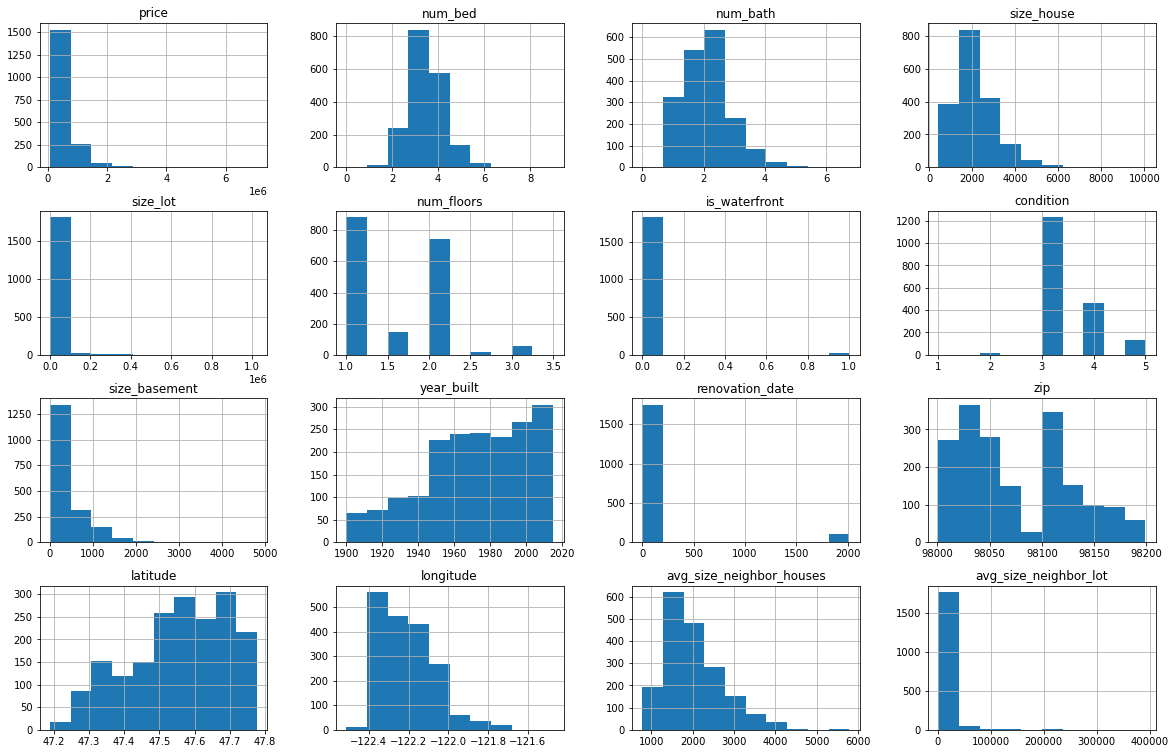

In [10]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
house_prices.hist(figsize=(20,13));

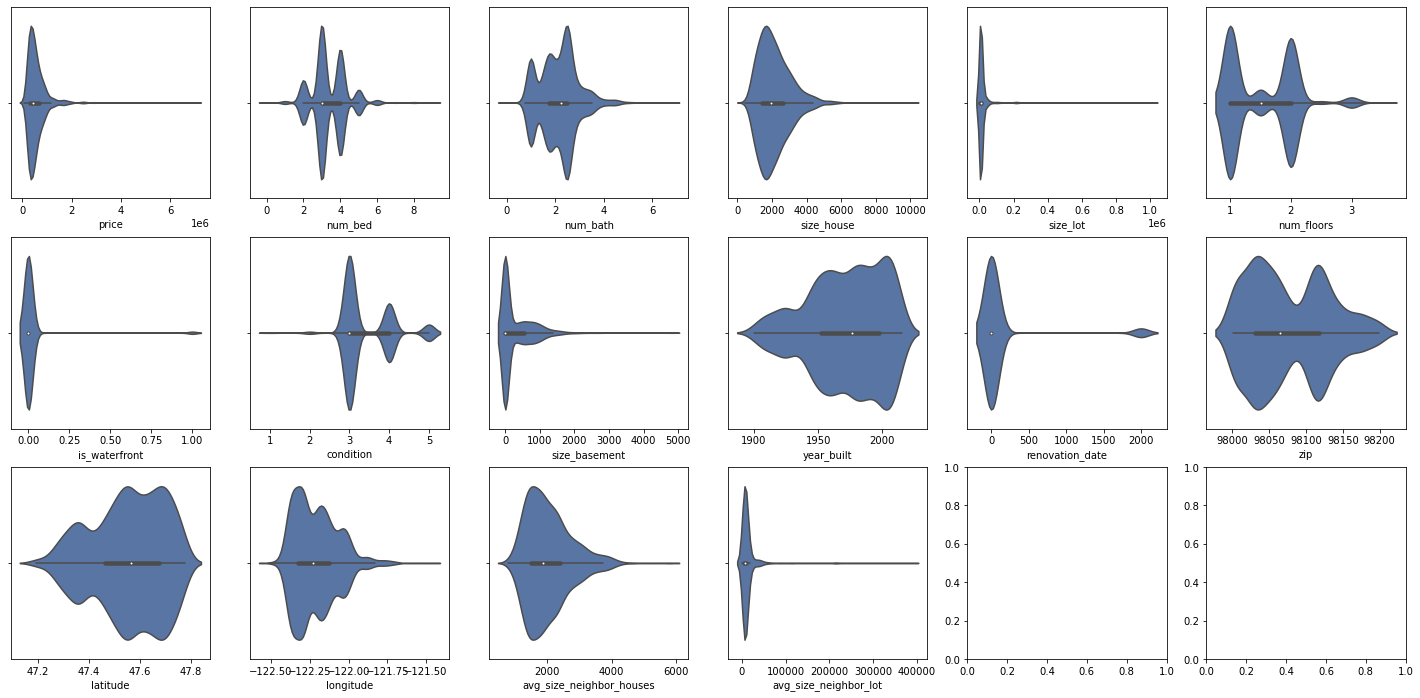

In [11]:
# %load solucao3.3.2adicional.py
fig, ax = plt.subplots(3,6, figsize=(25,12))
sns.set(font_scale = 1)
for i in range(len(house_prices.columns)):
     sns.violinplot(x=house_prices.iloc[:,i], ax=ax[i//6,i%6])
plt.show()

## Conclusões iniciais
(15 min): Reserve um tempo para olhar com calma as informações e tirar conclusões para próximos passos. Como no item 4.1, descreva em texto.

- Renovation_date na verdade é um ano. Como não há informação sobre dia ou mês, será mantido como numérico. 
- Contudo, o valor '0' significa que nunca houve reforma. Tratando-se de um atributo que deveria aumentar o valor do imóvel quanto menor fosse, os '0' não são consistentes com os outros valores. Acredito que deveria substituir pelo ano em que foi construído
- Há 5 colunas categóricas com valores numéricos:
  - Ordenadas: condition, beds, bathrooms
  - Não ordenadas: is_waterfront, zip
- Não está claro em nenhum lugar a definição de neighbor para as variáveis 14 e 15. Talvez seja equivalente a zip. A testar.
- Existem 22 diferentes valores para banheiros. Os valores assumem frações para representar lavabos. Será possível separar em duas variáveis: qtd de banheiros e qtd de lavabos?
- O dataset possui lat e long! Certamente plotaremos um mapa.
- Com um mapa poderemos verificar inúmeros aspectos (ex.: o que significa waterfront - mar, rio, lago, etc)
- Na descrição do dataset diz que size_house já inclui size_basement. Algumas possíveis novas  features: area_ex_basement, basement_ratio, area_per_floor, baths_bed_ratio
- As variáveis estão em escalas bem distintas. Algum tipo de scaling será necessário
- Outliers: 
    - Algumas distribuições estão bastante assimétricas. São outliers ou existe uma relação não linear dessas variáveis com as outras? Para as séries com assimetria a direita (cauda longa para valores maiores), como por exemplo price, podemos experimentar a utilização do log para corrigir. 
    - Poderemos também excluir se houver indícios de que é um erro ou que é um tipo de imóvel muito diferente (ex.: imóvel sem banheiro ou sem quarto, imóvel com 100% da área em basement).

## Reiterando na analise exploratória

(30 min): Escolha uma ou mais das conclusões (pense nos critérios: importância, facilidade, etc) e desenvolva o código.

In [12]:
# analisar como evoluiu ao longo dos ano o preço por medida de area dos imóveis
house_prices['price_area'] = house_prices['price'] / house_prices['size_house']

In [13]:
house_prices.pivot_table(values='size_house', columns='year_built',aggfunc='count')

year_built  1900  1901  1902  1903  1904  1905  1906  1907  1908  1909  ...  \
size_house     7     3     3     5     4     2     9     4    10     3  ...   

year_built  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  
size_house    43    33    36    15     8     7    15    22    55     3  

[1 rows x 116 columns]

<AxesSubplot:xlabel='year_built'>

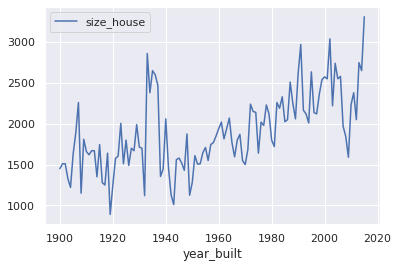

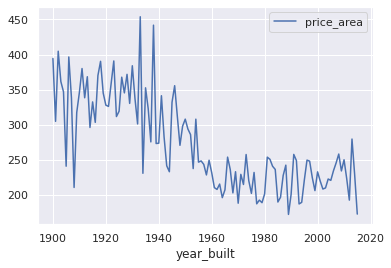

In [14]:
house_prices.pivot_table(values='size_house', columns='year_built',aggfunc='median').T.plot()
house_prices.pivot_table(values='price_area', columns='year_built',aggfunc='median').T.plot()

In [15]:
house_prices.loc[house_prices.renovation_date == 0, 'renovation_date'].shape

(1745,)

In [16]:
house_prices.loc[house_prices.renovation_date == 0, 'renovation_date'] = house_prices.loc[house_prices.renovation_date == 0, 'year_built']
house_prices.loc[house_prices.renovation_date == 0, 'renovation_date'].shape

(0,)

<AxesSubplot:>

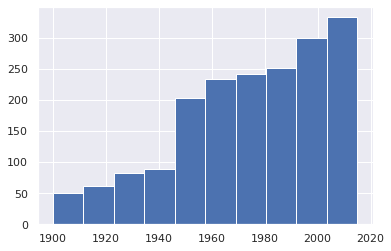

In [17]:
house_prices.renovation_date.hist()

In [18]:
# %load solucao3.5.1.py
# Irei analisar com mais detalhe a distribuição dos dados, em especial o efeito do preço e o aspecto geográfico. A informação geográfica de determinado item é uma 
# composição de duas variáveis (lat e long) que, isoladamente é difícil fazer sentido.
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc

def EDA_morestats(df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    # Outro ponto para ser verificado, porque para criar a coluna com a quantidade de valores unicos por coluna
    # Não utilizei a função df.unique() 
    colunas = df.columns.tolist()
    
        
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)
    
    eda_df['Mean'] = df.mean().round(3)
    eda_df['Min'] = df.min().round(3)
    eda_df['Max'] = df.max().round(3)
    eda_df['STD'] = df.std().round(3)
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]

In [19]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
EDA_morestats(house_prices)

Amount_NaN  %_NaN    DType  Amount_Data  \
price                              0    0.0    int64         1845   
num_bed                            0    0.0    int64         1845   
num_bath                           0    0.0  float64         1845   
size_house                         0    0.0    int64         1845   
size_lot                           0    0.0    int64         1845   
num_floors                         0    0.0  float64         1845   
is_waterfront                      0    0.0    int64         1845   
condition                          0    0.0    int64         1845   
size_basement                      0    0.0    int64         1845   
year_built                         0    0.0    int64         1845   
renovation_date                    0    0.0    int64         1845   
zip                                0    0.0    int64         1845   
latitude                           0    0.0  float64         1845   
longitude                          0    0.0  float64         1845   
avg_size_neighbor_houses           0    0.0    int64         1845   
avg_size_neighbor_lot              0    0.0    int64         1845   
price_area                         0    0.0  float64         1845   

                          Amount_Unique        Mean        Min          Max  \
price                               905  557127.039  81000.000  7062500.000   
num_bed                              10       3.380      0.000        9.000   
num_bath                             22       2.140      0.000        6.750   
size_house                          435    2128.445    410.000    10040.000   
size_lot                           1433   15642.504    649.000  1024068.000   
num_floors                            6       1.519      1.000        3.500   
is_waterfront                         2       0.014      0.000        1.000   
condition                             5       3.382      1.000        5.000   
size_basement                       174     290.644      0.000     4820.000   
year_built                          116    1971.820   1900.000     2015.000   
renovation_date                     116    1974.769   1900.000     2015.000   
zip                                  70   98076.913  98001.000    98199.000   
latitude                           1845      47.554     47.190       47.777   
longitude                          1845    -122.212   -122.515     -121.473   
avg_size_neighbor_houses            350    2022.428    780.000     5790.000   
avg_size_neighbor_lot              1363   12909.130    659.000   392040.000   
price_area                         1763     263.903     90.452      792.683   

                                 STD   Normality  Amount_Outliers  %_Outliers  
price                     403208.183  not_normal            106.0        0.06  
num_bed                        0.939  not_normal             51.0        0.03  
num_bath                       0.785  not_normal             64.0        0.03  
size_house                   955.754  not_normal             48.0        0.03  
size_lot                   41323.934  not_normal            225.0        0.12  
num_floors                     0.550  not_normal              0.0        0.00  
is_waterfront                  0.118  not_normal              NaN         NaN  
condition                      0.634  not_normal              2.0        0.00  
size_basement                461.996  not_normal             62.0        0.03  
year_built                    29.098  not_normal              0.0        0.00  
renovation_date               28.318  not_normal              0.0        0.00  
zip                           53.930  not_normal              0.0        0.00  
latitude                       0.140  not_normal              0.0        0.00  
longitude                      0.142  not_normal             25.0        0.01  
avg_size_neighbor_houses     704.368  not_normal             50.0        0.03  
avg_size_neighbor_lot      25949.821  not_normal            207.0        0.11  


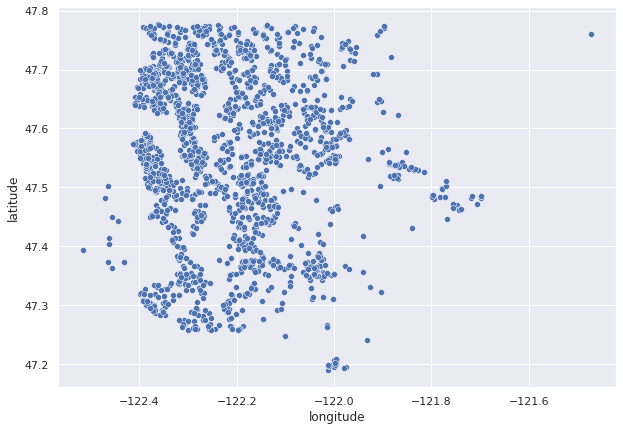

In [20]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
plt.figure(figsize=(10,7))
sns.scatterplot(x=house_prices.longitude, y=house_prices.latitude);
plt.show()

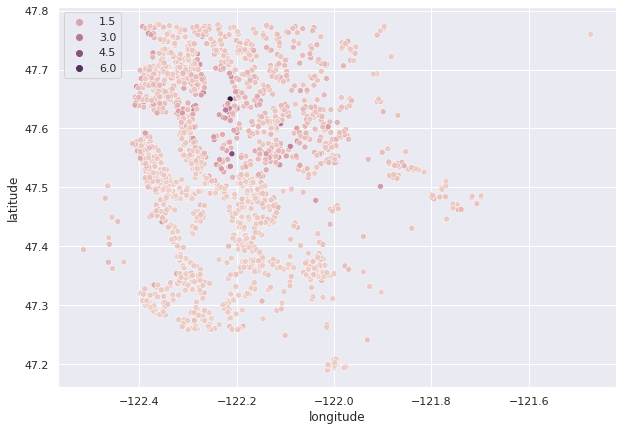

In [21]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
plt.figure(figsize=(10,7))
sns.scatterplot(x=house_prices.longitude, y=house_prices.latitude, hue=house_prices.price.tolist());
plt.show()

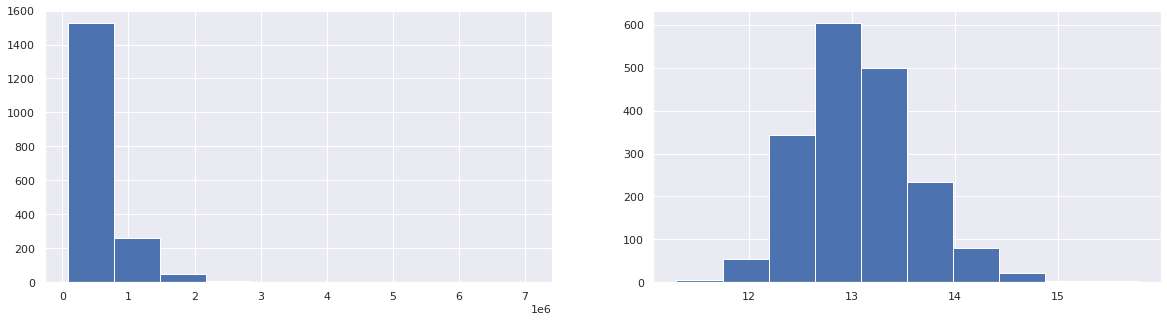

In [22]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Como a variável preço tem uma cauda longa a direita, a visualização da distribuição dos preços no mapa fica ruim.
# Vamos aplicar log para redristribuir. Essa transformação irá afetar diretamente o seu modelo. Ele irá passar a prever o log do preço. Para que a saída da sua previsão seja compreendida de forma monetária como os dados de entrada, você deverá fazer a transformação inversa (exp).
# Essa transformação, na prática, introduz uma não lineariedade ao seu modelo e às relações entre as variáveis. Ou seja, as variáveis que influenciam o preço da casa irão influenciar em escala exponencial (para cada variação unitária em X, Y variará 10). 
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(house_prices.price)
plt.subplot(122)
plt.hist(np.log(house_prices.price))
plt.show()

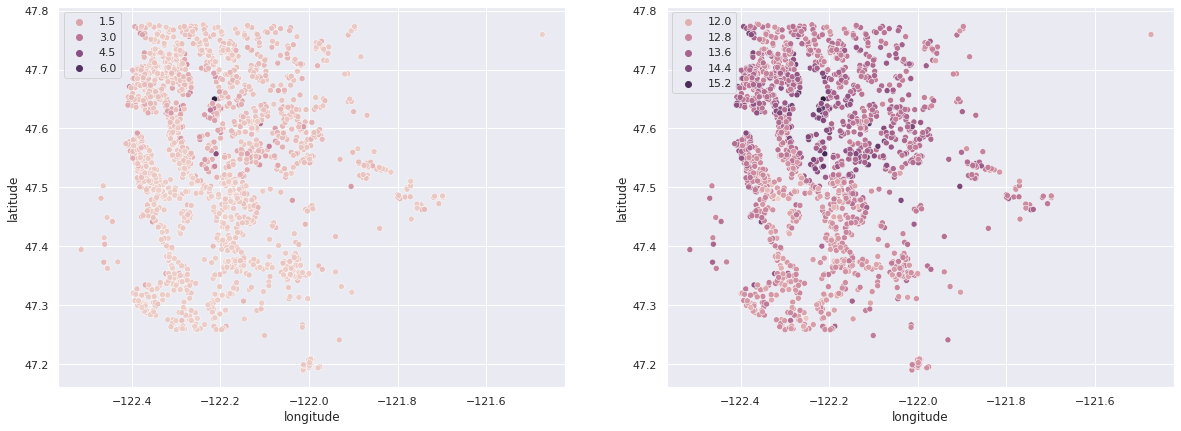

In [23]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
fig, ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(x=house_prices.longitude, y=house_prices.latitude, hue=house_prices.price.tolist(), ax=ax[0])
sns.scatterplot(x=house_prices.longitude, y=house_prices.latitude, hue=np.log(house_prices.price.tolist()), ax=ax[1])
plt.show()

In [24]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
house_prices['price_log'] = np.log(house_prices.price)
house_prices['price_log']

0       12.384219
1       14.046622
2       12.934828
3       12.439167
4       12.871335
          ...    
1840    11.747998
1841    13.142166
1842    13.140203
1843    12.577636
1844    12.727541
Name: price_log, Length: 1845, dtype: float64

In [25]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Geograficamente falando, parece haver outliers. Regiões distantes com baixo volume de casos (ex.: long > -121.6 ou lat < ~47.25)
long_thrs = -121.6
lat_thrs = 47.25
house_prices_selected = house_prices.loc[(house_prices.longitude < long_thrs) & (house_prices.latitude > lat_thrs) ,:] # tirando dos dados uma região onde tem poucos dados
print("Outliers dropped:", house_prices.shape[0] - house_prices_selected.shape[0])
print("Outliers %:", 100*round((house_prices.shape[0] - house_prices_selected.shape[0])/house_prices.shape[0],2))

Outliers dropped: 18
Outliers %: 1.0


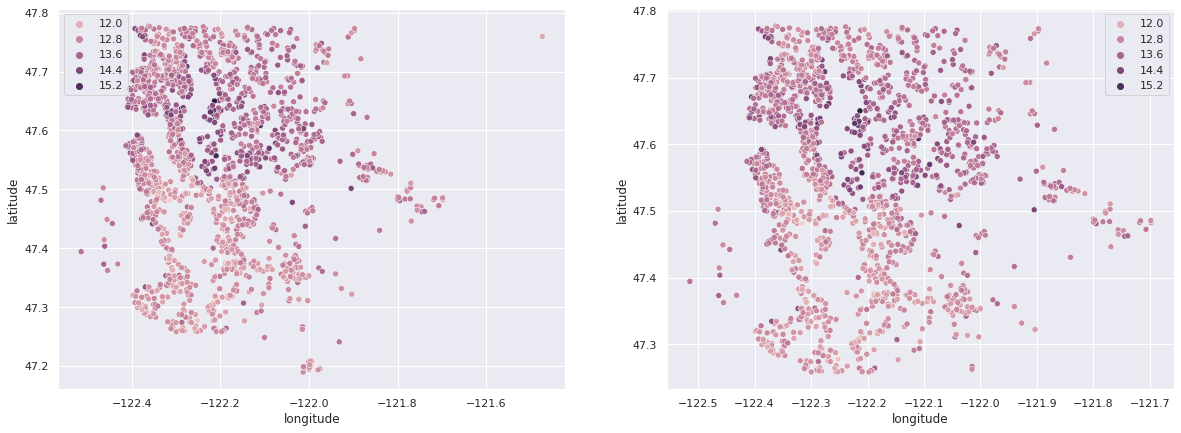

In [26]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.scatterplot(x=house_prices.longitude, y=house_prices.latitude, hue=np.log(house_prices.price.tolist()), ax=ax[0])
sns.scatterplot(x=house_prices_selected.longitude, y=house_prices_selected.latitude, hue=np.log(house_prices_selected.price.tolist()), ax=ax[1])
plt.show()

In [27]:
# %load solucao3.5.1adicional.py
# conda install folium
import folium
from folium.plugins import HeatMap
import json

m = folium.Map(location=[house_prices.latitude.mean(), house_prices.longitude.mean()])
folium.GeoJson('zipcode_king_county.geojson',name='geojson').add_to(m)
HeatMap(data=house_prices[['latitude', 'longitude', 'price_log']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist(), radius=9, max_zoom=13).add_to(m)
m

In [28]:
import geopandas as gpd
geojson = gpd.read_file('zipcode_king_county.geojson')

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# como o arquivo geojson e um json, todo seu conteudo sera interpretado como texto. Alem disso e uma variavel categorica. Portanto devemos mudar o tipo da variavel zip para texto.
house_prices.zip = house_prices.zip.astype('str')
print(' Zips únicos no geojson:', len(geojson.ZCTA5CE10.unique()),'\n',
      'Zips únicos no house prices:', len(house_prices.zip.unique()))

# percorro a lista procurando algum codigo faltante em alguma das listas
print("Está no house_prices, porém não no geojson")
for i in house_prices.zip.unique():
    if i not in geojson.ZCTA5CE10.unique():
        print(i)
print('--')
print("Está no geojson, porém não no house_prices")
for i in geojson.ZCTA5CE10.unique():
    if i not in house_prices.zip.unique():
        print(i)
print('--')

In [29]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# quantidade de casas que nao esta no geojson
house_prices.loc[house_prices.zip =='98033','zip'].shape[0]

0

In [30]:
house_prices.columns

Index(['price', 'num_bed', 'num_bath', 'size_house', 'size_lot', 'num_floors',
       'is_waterfront', 'condition', 'size_basement', 'year_built',
       'renovation_date', 'zip', 'latitude', 'longitude',
       'avg_size_neighbor_houses', 'avg_size_neighbor_lot', 'price_area',
       'price_log'],
      dtype='object')

In [31]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

# Use the groupby method to 
house_prices.zip = house_prices.zip.astype('str')
zipcode_data = house_prices.groupby('zip').aggregate(np.mean).reset_index()

# zipcode_data.reset_index(inplace = True)

# load my geojson file which contains my Polygons
boundary_file = "zipcode_king_county.geojson"
with open(boundary_file, 'r') as f:
    zipcode_boundary = json.load(f)

# Initialize Folium Map again (same as before)
m1 = folium.Map(location=[house_prices.latitude.mean(), house_prices.longitude.mean()], zoom_start=9.5)

# Create choropleth map  
folium.Choropleth(
    geo_data=zipcode_boundary,
    name='choropleth',
    data=zipcode_data,
    columns=['zip','price_area'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='Spectral',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='Mean Price'
).add_to(m1)

m1

In [32]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Algumas referências para plotagem de mapas com o folium, incluindo o case do house-prices
# https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2
# https://github.com/lindsallen/mapping/blob/master/dc_restaurants/dc_choropleth_wtooltip.ipynb

<AxesSubplot:>

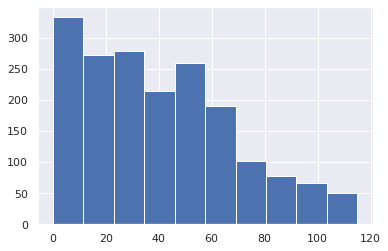

In [33]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
house_prices["years_since_renovation"] = house_prices["year_built"].max() - house_prices["renovation_date"] 
house_prices.years_since_renovation.hist()

<AxesSubplot:>

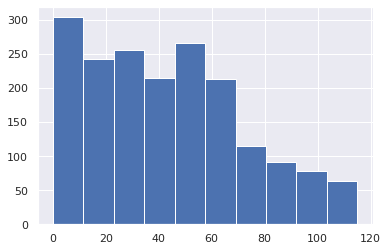

In [34]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

house_prices["age"] = house_prices["year_built"].max() - house_prices["year_built"]
house_prices.age.hist()

In [35]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

# Criando uma coluna new_cep sem o último dígito do ZIP CODE
house_prices['zip_group'] = house_prices.zip.astype(str).str[:4]
house_prices['zip_group'].value_counts()

9800    217
9805    214
9811    207
9803    190
9802    152
9810    139
9807    125
9812     90
9804     90
9814     72
9813     62
9801     54
9816     48
9817     47
9819     43
9809     27
9815     27
9806     25
9818     16
Name: zip_group, dtype: int64

In [36]:
# Como cientista de dados você deverá avaliar em que medida irá continuar explorando suas dúvidas e ideias sobre os dados ou avançar para outros tópicos. Uma boa prática é manter certo controle sobre as ideias/possíveis caminhos e conclusões como fizemos nos exercícios acima.
# Iremos seguir para outras fases do processo para explorar mais dimensões do problema ao invés de detalhar as conclusões ou dúvidas levantadas na fase anterior.
# Um dimensão relevante para olhar na análise exploratória é a correlação entre as variáveis.

----------------
# Aula 2 - Modelagem

- (10 min): <b>Atualização aula passada</b>
- (15 min): <b>Feture Selection</b>
- (15 min): Solução proposta
- (10 min): <b>Pre-processing</b>
- (10 min): Solução proposta
- (05 min): <b>Modelagem Inicial</b>
- (05 min): Solução proposta

- (10 min): Intervalo

- (15 min): <b>Análise dos resultados</b>
- (15 min): Solução proposta
- (10 min): <b>Conclusões iniciais</b>
- (15 min): Solução proposta

Obs.: carga horária total dessa parte de aproximadamente 8 hs (~ 1/2hr para adequação de ensino)

## Feature Selection
(15 min): procure identificar as variáveis mais promissoras para o seu modelo. Não considere apenas correlações. Pense na complexidade do processo (dummização, variáveis confusas). Tenha uma opinião. 
Esse é um exercicio que deve utilizar código (não é para ser apenas conceitual). Ao final dos 15 minutos chegue a uma lista de no máximo 6 features para o seu modelo.

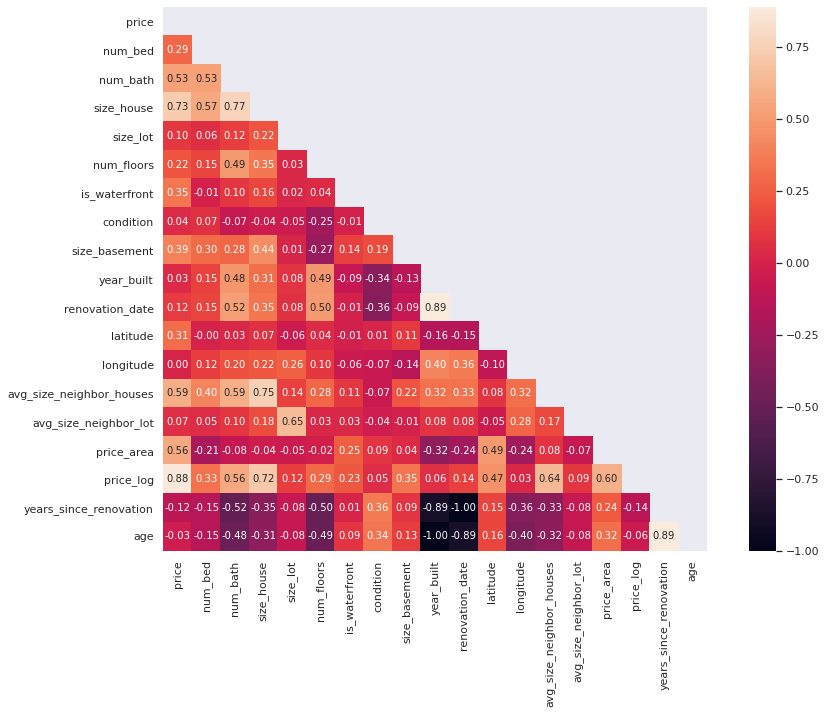

In [37]:
# %load solucao4.1.py
# Plotando um mapa de calor das correlações com todas as variáveis
corrmat = house_prices.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask=mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [38]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
corrmat_lower = (corrmat*~mask).replace({0.0:np.nan}).round(2)
corrmat_lower

price  num_bed  num_bath  size_house  size_lot  \
price                       NaN      NaN       NaN         NaN       NaN   
num_bed                    0.29      NaN       NaN         NaN       NaN   
num_bath                   0.53     0.53       NaN         NaN       NaN   
size_house                 0.73     0.57      0.77         NaN       NaN   
size_lot                   0.10     0.06      0.12        0.22       NaN   
num_floors                 0.22     0.15      0.49        0.35      0.03   
is_waterfront              0.35    -0.01      0.10        0.16      0.02   
condition                  0.04     0.07     -0.07       -0.04     -0.05   
size_basement              0.39     0.30      0.28        0.44      0.01   
year_built                 0.03     0.15      0.48        0.31      0.08   
renovation_date            0.12     0.15      0.52        0.35      0.08   
latitude                   0.31    -0.00      0.03        0.07     -0.06   
longitude                  0.00     0.12      0.20        0.22      0.26   
avg_size_neighbor_houses   0.59     0.40      0.59        0.75      0.14   
avg_size_neighbor_lot      0.07     0.05      0.10        0.18      0.65   
price_area                 0.56    -0.21     -0.08       -0.04     -0.05   
price_log                  0.88     0.33      0.56        0.72      0.12   
years_since_renovation    -0.12    -0.15     -0.52       -0.35     -0.08   
age                       -0.03    -0.15     -0.48       -0.31     -0.08   

                          num_floors  is_waterfront  condition  size_basement  \
price                            NaN            NaN        NaN            NaN   
num_bed                          NaN            NaN        NaN            NaN   
num_bath                         NaN            NaN        NaN            NaN   
size_house                       NaN            NaN        NaN            NaN   
size_lot                         NaN            NaN        NaN            NaN   
num_floors                       NaN            NaN        NaN            NaN   
is_waterfront                   0.04            NaN        NaN            NaN   
condition                      -0.25          -0.01        NaN            NaN   
size_basement                  -0.27           0.14       0.19            NaN   
year_built                      0.49          -0.09      -0.34          -0.13   
renovation_date                 0.50          -0.01      -0.36          -0.09   
latitude                        0.04          -0.01       0.01           0.11   
longitude                       0.10          -0.06      -0.07          -0.14   
avg_size_neighbor_houses        0.28           0.11      -0.07           0.22   
avg_size_neighbor_lot           0.03           0.03      -0.04          -0.01   
price_area                     -0.02           0.25       0.09           0.04   
price_log                       0.29           0.23       0.05           0.35   
years_since_renovation         -0.50           0.01       0.36           0.09   
age                            -0.49           0.09       0.34           0.13   

                          year_built  renovation_date  latitude  longitude  \
price                            NaN              NaN       NaN        NaN   
num_bed                          NaN              NaN       NaN        NaN   
num_bath                         NaN              NaN       NaN        NaN   
size_house                       NaN              NaN       NaN        NaN   
size_lot                         NaN              NaN       NaN        NaN   
num_floors                       NaN              NaN       NaN        NaN   
is_waterfront                    NaN              NaN       NaN        NaN   
condition                        NaN              NaN       NaN        NaN   
size_basement                    NaN              NaN       NaN        NaN   
year_built                       NaN              NaN       NaN        NaN   
renovation_date           

In [39]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# O mapa de calor ajuda nos primeiros insights. Mas e se eu quiser uma lista com as relações mais relevantes?
corr_list = abs(corrmat_lower).stack(dropna=True)\
                              .reset_index()\
                              .rename({'level_0':'var_1','level_1':'var_2',0:'corr'}, axis=1)\
                              .sort_values(by='corr', ascending=False)\
                              .head(20)
corr_list

var_1                     var_2  corr
162                       age                year_built  1.00
146    years_since_renovation           renovation_date  1.00
170                       age    years_since_renovation  0.89
145    years_since_renovation                year_built  0.89
54            renovation_date                year_built  0.89
163                       age           renovation_date  0.89
120                 price_log                     price  0.88
5                  size_house                  num_bath  0.77
81   avg_size_neighbor_houses                size_house  0.75
3                  size_house                     price  0.73
123                 price_log                size_house  0.72
95      avg_size_neighbor_lot                  size_lot  0.65
133                 price_log  avg_size_neighbor_houses  0.64
135                 price_log                price_area  0.60
78   avg_size_neighbor_houses                     price  0.59
80   avg_size_neighbor_houses                  num_bath  0.59
4                  size_house                   num_bed  0.57
105                price_area                     price  0.56
122                 price_log                  num_bath  0.56
1                    num_bath                     price  0.53

In [40]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
main_features = corr_list[['var_1','var_2']].stack().drop_duplicates().to_list()
print('Qtd de features:',len(main_features))
main_features

Qtd de features: 13


['age',
 'year_built',
 'years_since_renovation',
 'renovation_date',
 'price_log',
 'price',
 'size_house',
 'num_bath',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot',
 'size_lot',
 'price_area',
 'num_bed']

In [41]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# não irei utilizar variáveis categóricas e irei retirar variáveis duplicadas
retirar = ['zip','num_bed','num_bath','year_built','years_since_renovation','renovation_date', 'price_log', 'price']
for i in retirar:
    try:
        main_features.remove(i)
    except:
        pass

print('Qtd de features:',len(main_features))

Qtd de features: 6


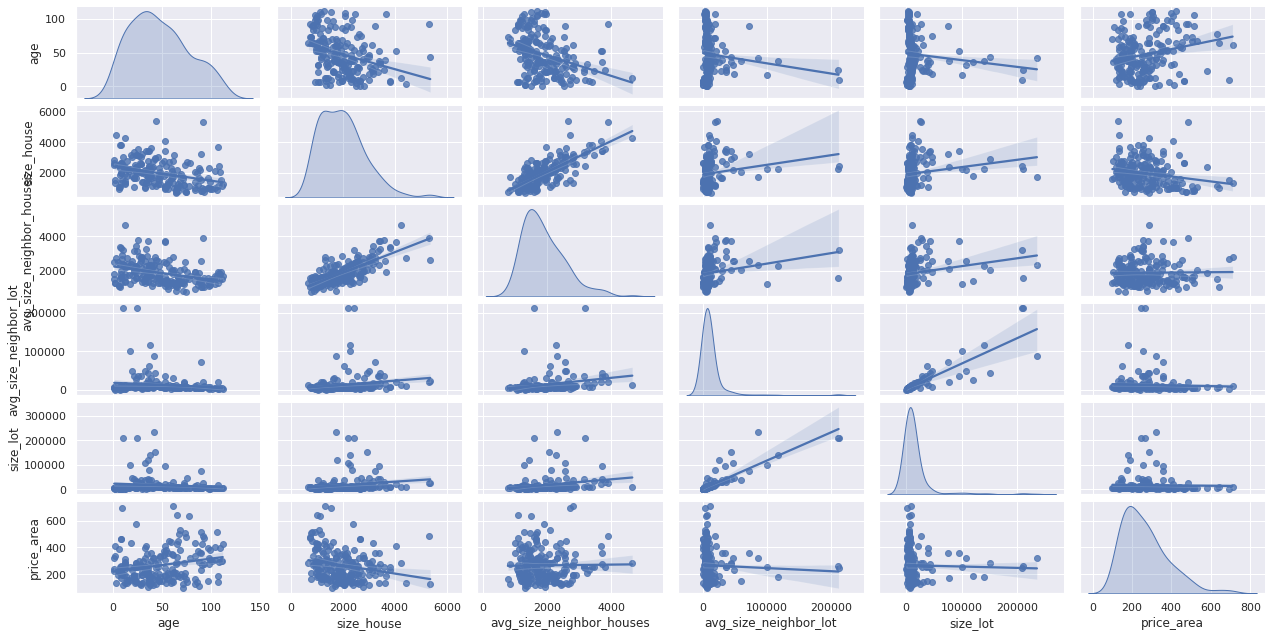

In [42]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Utilizaremos o PAIRPLOT para analisar as variáveis mais correlacionadas. É um gráfico pesado, portanto, trabalharemos com uma amostra (100 amostras). 
# Por ser uma amostra, setamos o seed para manter a reproducibilidade do nosso código.
seed = 123
sample_size = 200
hose_prices_sample = house_prices[main_features].sample(sample_size, random_state = seed)
sns.pairplot(hose_prices_sample, height=1.5, aspect=2, diag_kind='kde', kind='reg')

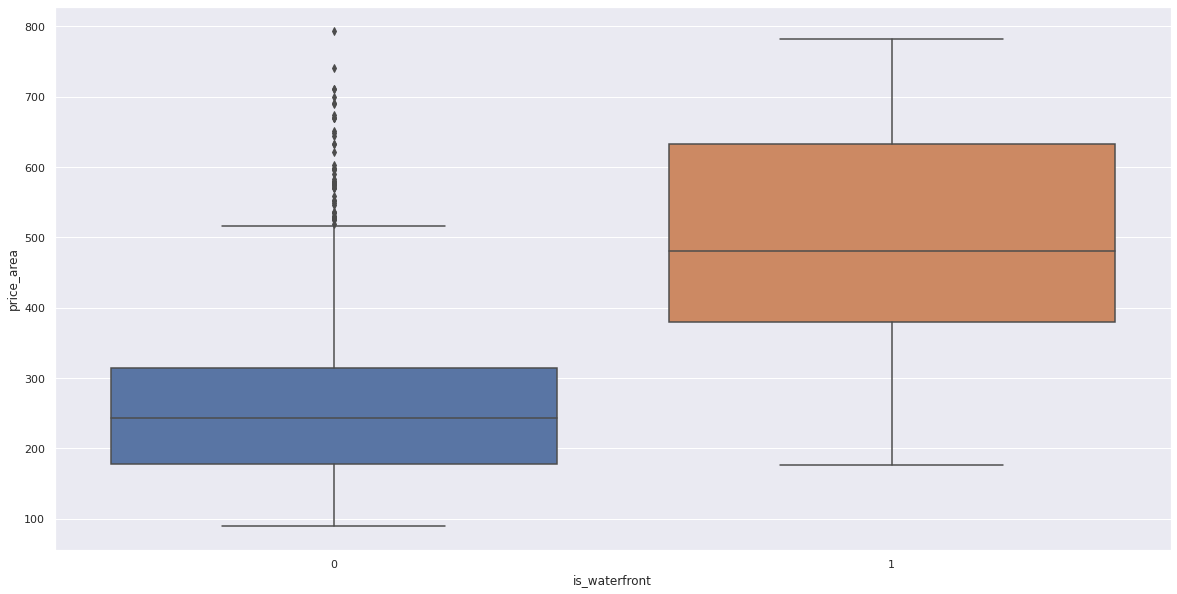

In [43]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# vamos experimentar as variáveis categóricas
plt.figure(figsize=(20,10))
sns.boxplot(x='is_waterfront',y='price_area',data=house_prices)
plt.show()

In [44]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
import scipy.stats as stats
# o teste t é um teste que identifica se duas amostras fazem parte da mesma população. A hipótese nula é que as duas amostras são da mesma populaçõa. 
# Portanto, se o p-valor do teste for menor que seu nível de significância (5%), elas não fazem parte da mesma população. Isso é um indicativo de quanto uma variável
# categórica poderá contribuir para o seu modelo.
resultado = stats.ttest_ind(house_prices[house_prices.is_waterfront == 0].price_area, house_prices[house_prices.is_waterfront == 1].price_area, equal_var=False)
threshold = 0.05
print(resultado)
if resultado.pvalue < threshold:
    print("Não se pode afirmar que as amostras são da mesma população.")
else:
    print("Pode-se afirmar com {} de certeza que as amostras são da mesma população.".format(1-threshold))
    

Ttest_indResult(statistic=-7.548504940315293, pvalue=6.127347781288245e-08)
Não se pode afirmar que as amostras são da mesma população.


Ttest_indResult(statistic=-7.548504940315293, pvalue=6.127347781288245e-08)
Não se pode afirmar que as amostras são da mesma população.


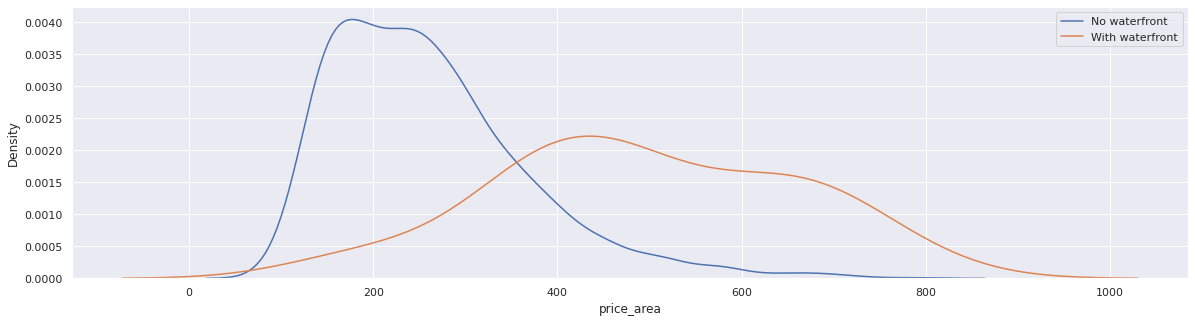

In [45]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
resultado = stats.ttest_ind(house_prices[house_prices.is_waterfront == 0].price_area, house_prices[house_prices.is_waterfront == 1].price_area, equal_var=False)
threshold = 0.05
print(resultado)
if resultado.pvalue < threshold:
    print("Não se pode afirmar que as amostras são da mesma população.")
else:
    print("Pode-se afirmar com {} de certeza que as amostras são da mesma população.".format(1-threshold))

plt.figure(figsize=(20,5))
sns.kdeplot(house_prices[house_prices.is_waterfront == 0].price_area, label='No waterfront')
sns.kdeplot(house_prices[house_prices.is_waterfront == 1].price_area, label='With waterfront')
plt.legend()
plt.show()

In [46]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# apesar do boxplot demonstrar que existe uma diferença de preços o gráfico demonstra que 
print(house_prices.is_waterfront.value_counts())

0    1819
1      26
Name: is_waterfront, dtype: int64


In [47]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
zip_group_order = pd.DataFrame(house_prices.groupby('zip').price_area.mean().sort_values(ascending=False))
round(zip_group_order,2).head()

price_area
zip              
98039      642.03
98004      471.27
98112      470.16
98109      438.27
98105      428.78

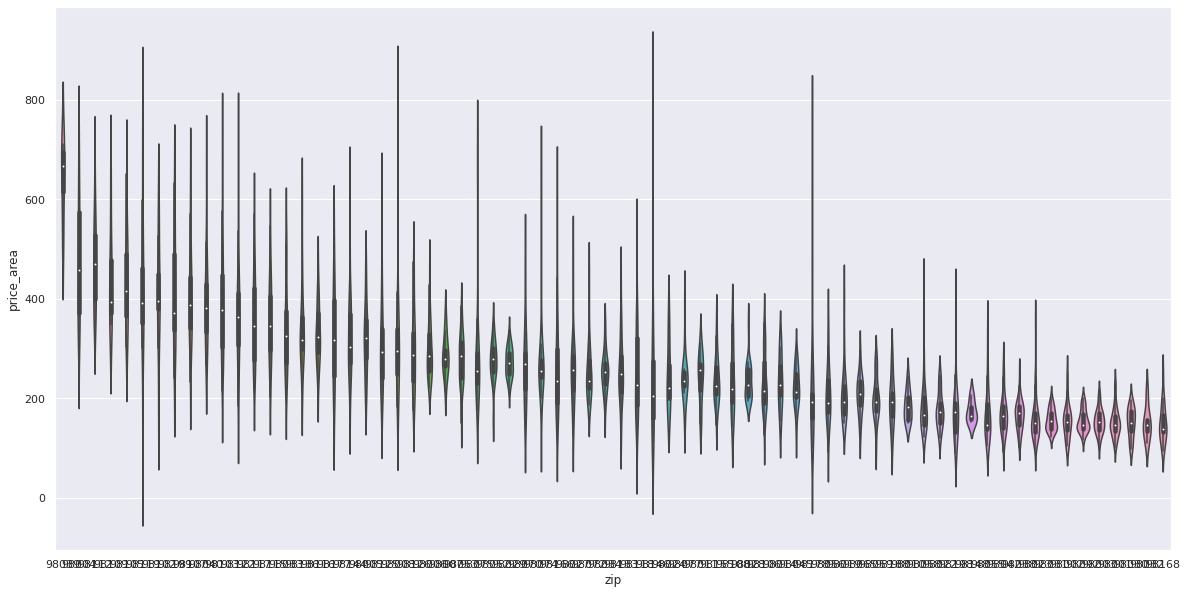

In [48]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
plt.figure(figsize=(20,10))
sns.violinplot(x='zip',y='price_area',data=house_prices, order=zip_group_order.index)
plt.show()

In [49]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# variáveis categóricas com muitas classes podem ser agregadas de diferentes maneiras. Quando códigos postais, em geral, é possível agregar reduzindo uma casa numérica.
house_prices['zip_group'] = house_prices.zip.astype(str).str[:4]

zip_group_order = house_prices.groupby('zip_group').aggregate({'price_area':"mean", 'zip_group':'count'}).sort_values(by='price_area', ascending=False)
zip_group_order

price_area  zip_group
zip_group                       
9810       354.966714        139
9811       343.647354        207
9812       323.438010         90
9819       292.196823         43
9813       284.706099         62
9814       279.609560         72
9817       273.498018         47
9807       264.576707        125
9800       256.148161        217
9804       239.990815         90
9815       235.254362         27
9803       223.079153        190
9805       222.748601        214
9802       218.596807        152
9801       214.771730         54
9816       211.655641         48
9806       208.073519         25
9818       193.480209         16
9809       154.492107         27

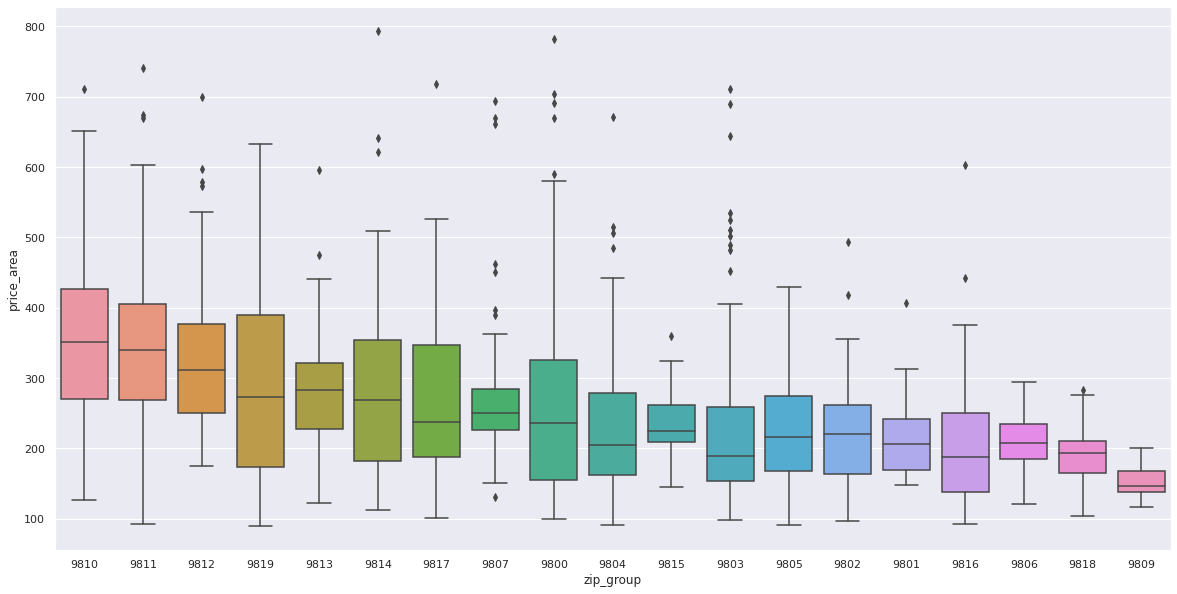

In [50]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
plt.figure(figsize=(20,10))
sns.boxplot(x='zip_group',y='price_area',data=house_prices, order=zip_group_order.index)
plt.show()

Não se pode afirmar que 9800 e 9803 são da mesma população.


Pode-se afirmar que 9803 e 9805 com 0.95 de certeza que as amostras são da mesma população.




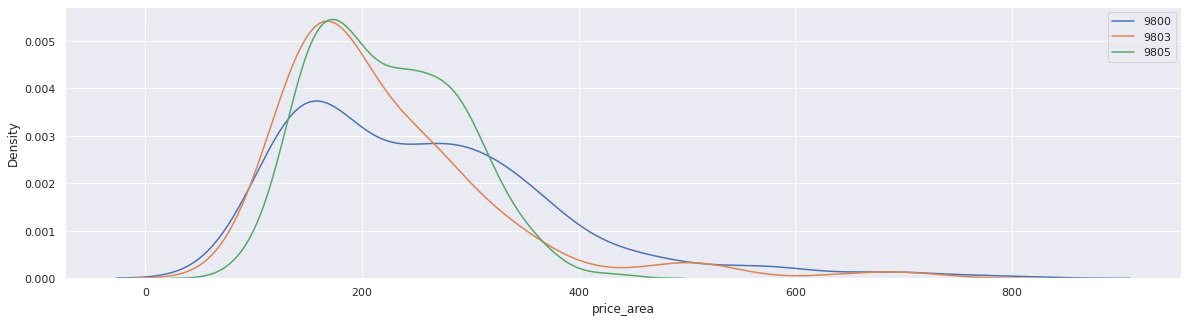

In [51]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
sample_a = house_prices[house_prices.zip_group == '9800'].price_area
sample_b = house_prices[house_prices.zip_group == '9803'].price_area
sample_c = house_prices[house_prices.zip_group == '9805'].price_area
resultado_a_b = stats.ttest_ind(sample_a, sample_b, equal_var=False)
resultado_b_c = stats.ttest_ind(sample_b, sample_c, equal_var=False)
threshold = 0.05
if resultado_a_b.pvalue < threshold:
    print("Não se pode afirmar que 9800 e 9803 são da mesma população.")
else:
    print("Pode-se afirmar que 9800 e 9803 com {} de certeza que as amostras são da mesma população.".format(1-threshold))
    
print('\n')
    
if resultado_b_c.pvalue < threshold:
    print("Não se pode afirmar que 9803 e 9805 são da mesma população.")
else:
    print("Pode-se afirmar que 9803 e 9805 com {} de certeza que as amostras são da mesma população.".format(1-threshold))

print('\n')
plt.figure(figsize=(20,5))
sns.kdeplot(sample_a, label='9800')
sns.kdeplot(sample_b, label='9803')
sns.kdeplot(sample_c, label='9805')
plt.legend()
plt.show()

Obs.: Analisar com estatística espacial

In [52]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Para a primeira estimativa de modelo, vou focar nas variáveis contínuas e nao duplicadas
cols_drop = ['num_bath','is_waterfront','num_bed','num_floors','condition','zip', 'zip_group','year_built','renovation_date', 'years_since_renovation', 'price', 'price_log']
house_prices_cont = house_prices.drop(cols_drop, axis=1).copy()
abs(house_prices_cont.corr().price_area).sort_values(ascending=False)[1:] # a 1a linha é a correlação da própria variável com ela mesma

latitude                    0.492296
age                         0.315182
longitude                   0.241453
avg_size_neighbor_houses    0.079097
avg_size_neighbor_lot       0.073449
size_lot                    0.049257
size_house                  0.043096
size_basement               0.039871
Name: price_area, dtype: float64

<!--- ## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ## -->
## Pre-processing
(10 min): seja bem objetivo nesse passo. As melhorias possíveis nesse passo dependerão da revisão do seu modelo. Para efeito de planejamento, ao final dos 10 minutos você deve ter aplicado tratamentos de scaling e a separação de treino e teste. 
<!--- ## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ## 
-->

In [53]:
# %load solucao4.2.py
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
import sklearn.preprocessing as skpp
import sklearn.model_selection as skms

In [54]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
y = house_prices_cont.price_area.values
Xs = house_prices_cont.drop('price_area', axis=1).values
X_train, X_test, y_train, y_test = skms.train_test_split(Xs, y, random_state=seed, test_size=0.3)

In [55]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
print(' X train:', X_train.shape, '\n',
      'X test:', X_test.shape, '\n',
      'y train:', y_train.shape, '\n',
      'y test:', y_test.shape)

 X train: (1291, 8) 
 X test: (554, 8) 
 y train: (1291,) 
 y test: (554,)


In [56]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
house_prices_cont.columns

Index(['size_house', 'size_lot', 'size_basement', 'latitude', 'longitude',
       'avg_size_neighbor_houses', 'avg_size_neighbor_lot', 'price_area',
       'age'],
      dtype='object')

Pode-se afirmar que price treino e teste com 0.9999 de certeza que as amostras são da mesma população.
Pode-se afirmar que size_house de treino e teste com 0.9999 de certeza que as amostras são da mesma população.


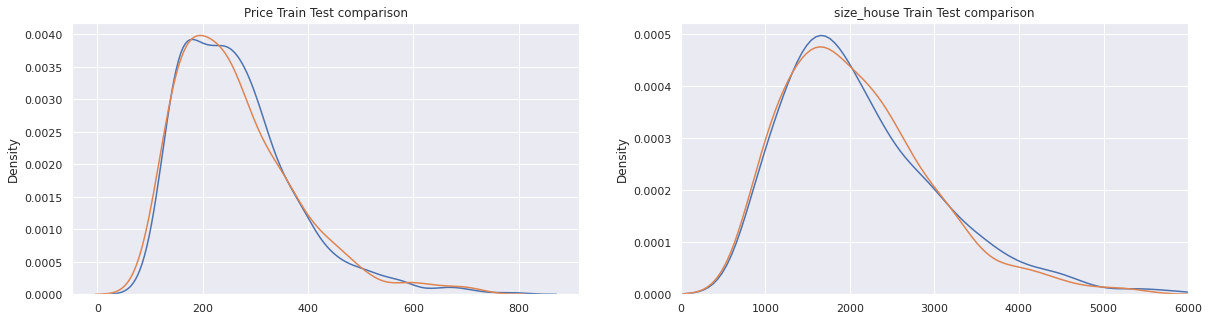

In [57]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
fig, ax = plt.subplots(1,2, figsize=(20,5))
threshold = 0.0001

sample_a = y_train
sample_b = y_test
resultado_a_b = stats.ttest_ind(sample_a, sample_b, equal_var=False)
if resultado_a_b.pvalue < threshold:
    print("Não se pode afirmar que price de treino e teste são da mesma população.")
else:
    print("Pode-se afirmar que price treino e teste com {} de certeza que as amostras são da mesma população.".format(1-threshold))

sns.kdeplot(sample_a, label='Train', ax=ax[0])
sns.kdeplot(sample_b, label='Test',ax=ax[0])
ax[0].set_title('Price Train Test comparison')
sample_a = X_train[:,0] # size_house
sample_b = X_test[:,0] # size_house
resultado_a_b = stats.ttest_ind(sample_a, sample_b, equal_var=False)
threshold = 0.0001
if resultado_a_b.pvalue < threshold:
    print("Não se pode afirmar que size_house de treino e teste são da mesma população.")
else:
    print("Pode-se afirmar que size_house de treino e teste com {} de certeza que as amostras são da mesma população.".format(1-threshold))

sns.kdeplot(sample_a, label='Train', ax=ax[1])
sns.kdeplot(sample_b, label='Test',ax=ax[1])
ax[1].set_xlim(0,6000)
ax[1].set_title('size_house Train Test comparison')
plt.show()

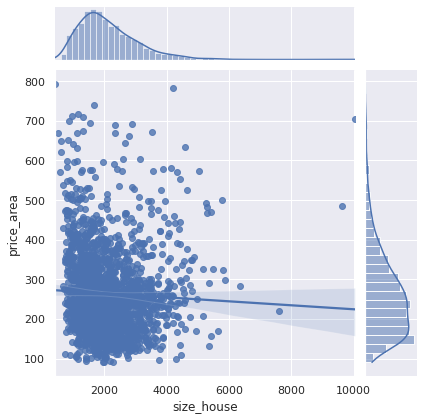

In [58]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
sns.jointplot(x=house_prices['size_house'], y=house_prices['price_area'], kind='reg');

In [59]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
## Standar scaler, minmax scaler...
rscaler = skpp.RobustScaler() # (y - y_median)/IQR
sscaler = skpp.StandardScaler() # (y - y_mean)/std
rscaler.fit(X_train)
sscaler.fit(X_train)

X_train_rscaler = rscaler.transform(X_train)
X_test_rscaler = rscaler.transform(X_test)
X_train_sscaler = sscaler.transform(X_train)


In [60]:
X_train[0]

array([1450.        , 2272.        ,  700.        ,   47.63300296,
       -122.28176   , 2170.        , 4370.        ,   91.        ])

In [61]:
X_train_rscaler[0]

array([-0.40748441, -0.93309499,  1.26126126,  0.30100967, -0.2674057 ,
        0.30612245, -0.65868856,  1.15217391])

In [62]:
X_train_sscaler[0]

array([-0.7149751 , -0.35399401,  0.87683389,  0.54804059, -0.50024744,
        0.19266327, -0.31452225,  1.63540409])

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
## Modelagem
(05 min): como no passo anterior, seja bastante objetivo. Aqui sõ queremos gerar um primeiro modelo e suas saídas (coeficientes, valores preditos, performance, etc). Na próxima etapa gastaremos mais tempo analisando esses resultados.

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##--
-->

In [63]:
# %load solucao4.3.1.py

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
### Treinamento

In [64]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
import sklearn.linear_model as lm

In [65]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
model_lr = lm.LinearRegression()
model_lr.fit(X_train_rscaler, y_train)

LinearRegression()

In [66]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
y_pred = model_lr.predict(X_train_rscaler)
features_names = house_prices_cont.drop('price_area', axis=1).columns
# pesos ou coeficientes que cada variável recebeu no modelo
weights = pd.DataFrame(model_lr.coef_,index=features_names, columns=['weight'])
intercept = model_lr.intercept_
resid_train = y_pred-y_train

Obs.: rodar o statsmodels para o X_train_rscaler / Y_train

In [67]:
weights

weight
size_house               -24.268870
size_lot                   1.545721
size_basement             -2.918559
latitude                  70.715400
longitude                -23.120367
avg_size_neighbor_houses  42.196224
avg_size_neighbor_lot     -1.893699
age                       43.749613

In [68]:
abs(weights).sort_values(by='weight', ascending=False)

weight
latitude                  70.715400
age                       43.749613
avg_size_neighbor_houses  42.196224
size_house                24.268870
longitude                 23.120367
size_basement              2.918559
avg_size_neighbor_lot      1.893699
size_lot                   1.545721

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ## -->
### Análise dos resultados
(15 min): agora gaste um tempo avaliando o seu modelo. Verifique quais variáveis tiveram mais peso, procure identificar onde seu modelo erra mais. Gostaria especificamente que não se baseassem em uma métrica de erro já pronta (r-quadrado, RMSE, etc). Construa a sua forma de avaliar o erro. Teremos um tempo a seguir para tirar conclusões com base na solução proposta.
Esse é um exercicio que deve utilizar código (não é para ser apenas conceitual). Ao final dos 15 minutos procure ter uma medida sua (qualquer medida, de qualquer jeito) da performance do modelo.
<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ## 
-->

In [69]:
# %load solucao4.3.2.1.py

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
#### Coeficientes

In [70]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
print('Pesos:')
display(weights)
print('Intercept:', round(intercept,2))

Pesos:


weight
size_house               -24.268870
size_lot                   1.545721
size_basement             -2.918559
latitude                  70.715400
longitude                -23.120367
avg_size_neighbor_houses  42.196224
avg_size_neighbor_lot     -1.893699
age                       43.749613

Intercept: 265.13


In [71]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
train_data = pd.DataFrame(X_train_rscaler)
train_data.columns = house_prices_cont.drop('price_area', axis=1).columns.to_list()
EDA_morestats(train_data)

Amount_NaN  %_NaN    DType  Amount_Data  \
size_house                         0    0.0  float64         1291   
size_lot                           0    0.0  float64         1291   
size_basement                      0    0.0  float64         1291   
latitude                           0    0.0  float64         1291   
longitude                          0    0.0  float64         1291   
avg_size_neighbor_houses           0    0.0  float64         1291   
avg_size_neighbor_lot              0    0.0  float64         1291   
age                                0    0.0  float64         1291   

                          Amount_Unique   Mean    Min     Max    STD  \
size_house                          401  0.169 -1.272   6.736  0.807   
size_lot                           1045  1.247 -1.201  84.480  6.161   
size_basement                       160  0.533  0.000   4.901  0.831   
latitude                           1291 -0.063 -1.803   0.986  0.664   
longitude                          1291  0.084 -1.433   2.652  0.703   
avg_size_neighbor_houses            312  0.152 -1.247   4.410  0.800   
avg_size_neighbor_lot               992  1.023 -1.393  76.024  5.349   
age                                 114  0.113 -0.826   1.674  0.636   

                           Normality  Amount_Outliers  %_Outliers  
size_house                not_normal               32        0.02  
size_lot                  not_normal              150        0.12  
size_basement             not_normal               45        0.03  
latitude                  not_normal                0        0.00  
longitude                 not_normal               18        0.01  
avg_size_neighbor_houses  not_normal               44        0.03  
avg_size_neighbor_lot     not_normal              136        0.11  
age                       not_normal                0        0.00

In [72]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
weights_merge = weights.merge(EDA_morestats(train_data)[['Min','Max']], left_index=True, right_index=True)
def min_max(row):
    if row[0] < 0:
        result = row[0]*row[1]
    else:
        result = row[0]*row[2]
    return result
weights_merge['Max_val'] = weights_merge.apply(lambda x: min_max(x), axis=1) 
display(weights_merge.round(2))
print('Intercept:', round(intercept,2))

weight   Min    Max  Max_val
size_house                -24.27 -1.27   6.74    30.87
size_lot                    1.55 -1.20  84.48   130.58
size_basement              -2.92  0.00   4.90    -0.00
latitude                   70.72 -1.80   0.99    69.73
longitude                 -23.12 -1.43   2.65    33.13
avg_size_neighbor_houses   42.20 -1.25   4.41   186.09
avg_size_neighbor_lot      -1.89 -1.39  76.02     2.64
age                        43.75 -0.83   1.67    73.24

Intercept: 265.13


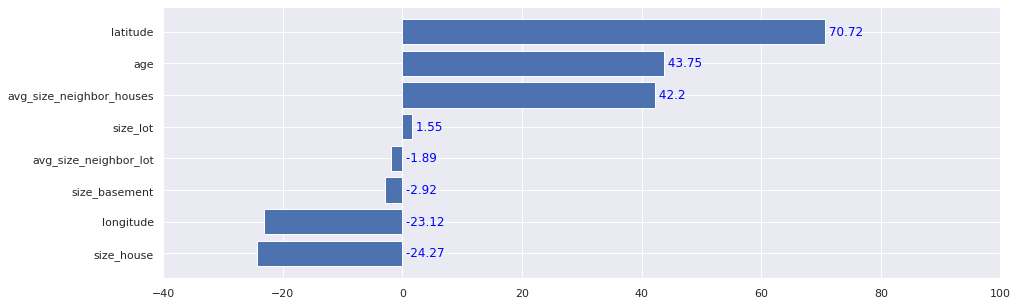

In [73]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
weights = weights.sort_values(by='weight')
plt.figure(figsize=(15,5))
plt.barh(weights.index,weights['weight'])
plt.xlim(-40,100)
for i, v in enumerate(weights['weight']):
    if v > 0:
        plt.text(v, i, " "+str(round(v,2)), color='blue', va='center')
    else:
        plt.text(0, i, " "+str(round(v,2)), color='blue', va='center')
    
    

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
#### Erro e resíduos
<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
-->

In [74]:
# %load solucao4.3.2.2.py

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
<b><i><u><font size='4'>DEFINIÇÕES E MÉTRICAS:</b><p>
    1) <b>Resíduo</b>: é a diferença entre o valor previsto e o valor real. Também pode ser chamado de erro, mas em geral usamos resíduo para a diferença e erro para descrever o conjunto do resultado.<p>
    2) <b>MSE</b>: <i>mean squared error</i> ou média dos erros quadráticos. É a média da soma dos quadrados dos erros. Ao fazer o quadrado do erro, é possível acumular os erros positivos e negativos. É uma métrica de erro própria ao modelo, pois depende da ordem de grandeza da variável. O MSE de um modelo para prever preços por m2 não compara com o MSE de um modelo para prever preço total.<p>
    3) <b>RMSE</b>: <i>root mean squared error</i> ou raiz da média dos erros quadráticos. Aplica a raiz na métrica anterior. Como a média é extraída antes de aplicar a raiz, essa métrica dá mais peso a erros maiores. Ou seja, resíduos com valores altos terão a sua influência na métrica elevada ao quadrado. Como você quer um modelo que reduza seu erro, se utilizar o RMSE para otimizar, você buscará meios para reduzir os erros extremos.<p>
    4) <b>MAE</b>: <i> mean absolute error</i> ou média absoluta dos erros. Por fazer a diferença absoluta, não penaliza erros maiores. Se seu modelo não precisa prever bem outliers ou não possui outliers, pode ser adequada.<p>
    5) <b>R2</b>: é uma medida do quão melhor o seu modelo é em relação à uma média simples dos dados (modelo mais simples possivel). Calcula-se o erro desse modelo simples através do MSE considerando como valor predito a média dos dados. Daí divide-se o MSE do modelo pelo MSE dos dados. A diferença desse resultado para 1 é o R2. Quanto menor for o MSE do modelo, mais próxima de zero a divisão estará e mais próximo de 1 o R2 estará. Quanto maior for o seu MSE, menor será seu R2. Um R2 de 0.0 significa que seu modelo é tão bom quanto assumir a média dos valores. Um R2 de 1 significa que seu modelo captura tão bem os valores reais, que ele praticamente não erra, independente da relação com o MSE simples. O R2 nunca pode ser maior que 1 mas pode assumir valores negativos, pois seu modelo pode ser pior do que a média para prever os valores. Uma grande vantagem do R2 é que ele não tem escala, portanto é uma métrica que permite a comparação de modelos distintos.<p>
    6) <b>MAPE</b>: <i> mean absolute percentage error</i> ou média absoluta dos erros percentuais. Elimina o efeito escala da variável target. Contudo, como executa uma divisão, valores muito próximos à zero da variável target tendem a gerar um erro muito maior. Além disso, o efeito gerado por erros negativos é superestimado em relação aos erros positivos.<p>
    7) <b>MPE</b>: <i> mean percentage error</i> ou média dos erros percentuais. Também elimina o efeito escala da variável target. Com base nos argumentos para o MSE, é contra-intuivo acreditar que o MPE seja útil. Contudo, como é um valor percentual, ele acaba sendo um indicador do quanto seu modelo está enviesado para erros positivos ou negativos.<p>
    8) <b>Overfit e underfit</b>: <i> overfit</i> é o comportamento que o modelo assume ao ajustar exageradamente aos dados de treino, de tal forma que sua performance com dados de teste é muito inferior. Diz-se que o modelo não 'generalizou' o suficiente. <i> underfit</i> É quando seu modelo não conseguiu representar suficientemente bem os dados.
<!---<img source='./img/table.jpg'>-->
Referências externas:
https://www.dataquest.io/blog/understanding-regression-error-metrics/

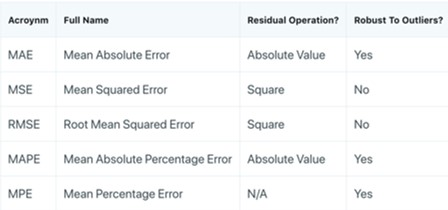

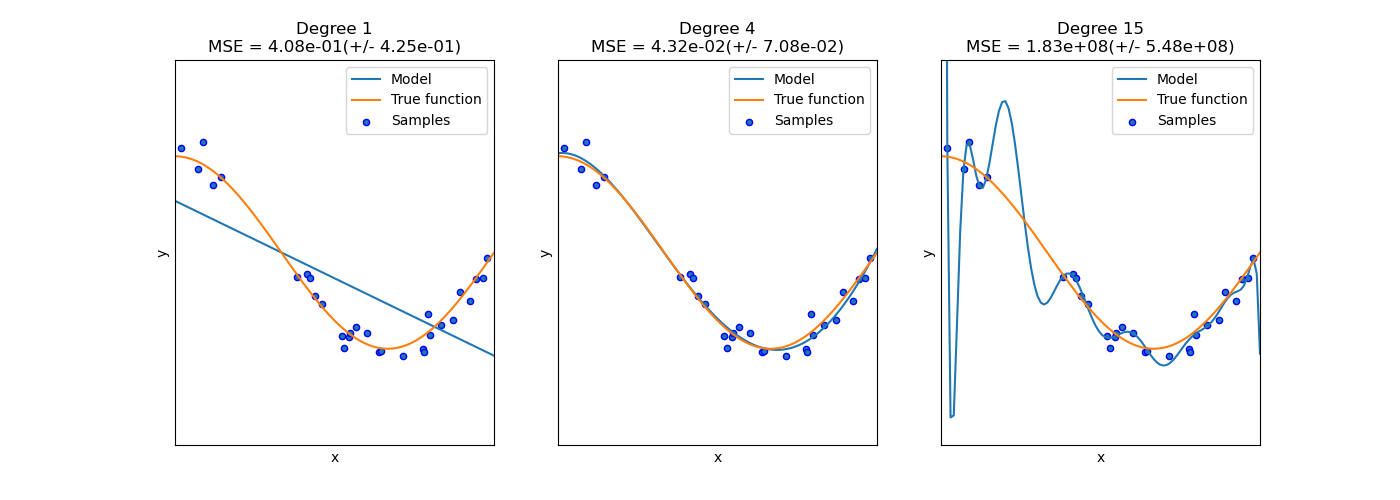

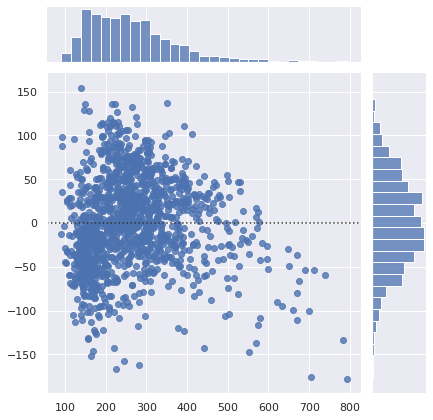

In [75]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
from IPython.display import Image
sns.jointplot(x=y_train,y=y_pred, kind='resid').set_axis_labels("");display(Image(filename='./img/table.jpg'),Image(filename='./img/overfit.png'))

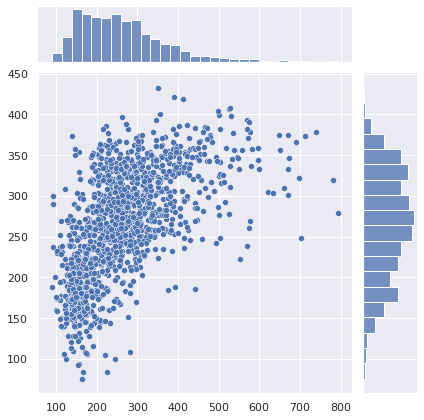

In [76]:
sns.jointplot(x=y_train,y=y_pred, kind='scatter').set_axis_labels("");

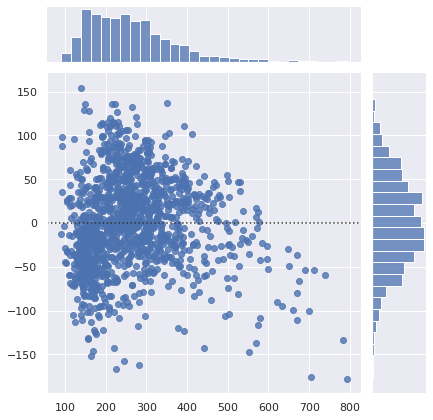

In [77]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
sns.jointplot(x=y_train,y=y_pred, kind='resid').set_axis_labels("");

In [78]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
print('Features no modelo:',len(model_lr.coef_))
indice = 0
print('Valores das features para o exemplo de índice', indice)
X_train_rscaler[indice,]

Features no modelo: 8
Valores das features para o exemplo de índice 0


array([-0.40748441, -0.93309499,  1.26126126,  0.30100967, -0.2674057 ,
        0.30612245, -0.65868856,  1.15217391])

In [79]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
y_calc = 0
for i in range(len(model_lr.coef_)):
    y_calc += model_lr.coef_[i]*X_train_rscaler[indice,i]
y_calc +=model_lr.intercept_
print(' Y do modelo:                 ', round(y_pred[indice],2), '\n', 
      'Y calculado com coeficientes:', round(y_calc,2))

 Y do modelo:                  361.93 
 Y calculado com coeficientes: 361.93


In [80]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
round(np.dot(X_train_rscaler[0,],model_lr.coef_)+model_lr.intercept_,2)

361.93

In [81]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
print(' Y real:   ',round(float(y_train[indice]),2), '\n'
     ' Y predito:', round(y_pred[indice],2),'\n',
     'Erro abs: ', round(y_train[indice]-y_pred[indice],2),'\n',
     'Erro %: ', round((y_train[indice]-y_pred[indice])/y_train[indice],2))

 Y real:    361.38 
 Y predito: 361.93 
 Erro abs:  -0.56 
 Erro %:  -0.0


In [82]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Soma dos resíduos (diferença entre o previsto e o real)
y_error = 0
for i in range(len(y_pred)):
    y_error += y_pred[i] - y_train[i]
round(y_error,2)

-0.0

In [83]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# Raiz da média da soma dos quadrados Root Mean Squared Error (RMSE)
y_error = 0
# soma dos quadrados
for i in range(len(y_pred)):
    y_error += (y_pred[i] - y_train[i])**2 
# média
y_error /= len(y_pred)
print('MSE:', round(y_error,2))
y_error **= (1/2)

print('RMSE:',round(y_error,2))

MSE: 7722.18
RMSE: 87.88


In [84]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
import sklearn.metrics as skme
round(skme.mean_squared_error(y_train,y_pred)**(1/2),2)

87.88

In [85]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
# R2
y_error = 0
y_error_media = 0
# soma dos quadrados
for i in range(len(y_pred)):
    y_error += (y_pred[i] - y_train[i])**2 
# média
y_error /= len(y_pred)
print('MSE modelo:', round(y_error,2))

for i in range(len(y_train)):
    y_error_media += (y_train[i] - np.mean(y_train))**2 
y_error_media /= len(y_train)
print('MSE média:', round(y_error_media,2))

r2 = 1 - y_error/y_error_media
print('R2:',round(r2,2))

MSE modelo: 7722.18
MSE média: 12137.71
R2: 0.36


In [86]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
r2_train = round(model_lr.score(X_train_rscaler, y_train),2)
r2_train

0.36

In [87]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
r2_test = round(model_lr.score(X_test_rscaler, y_test),2)
r2_test

0.34

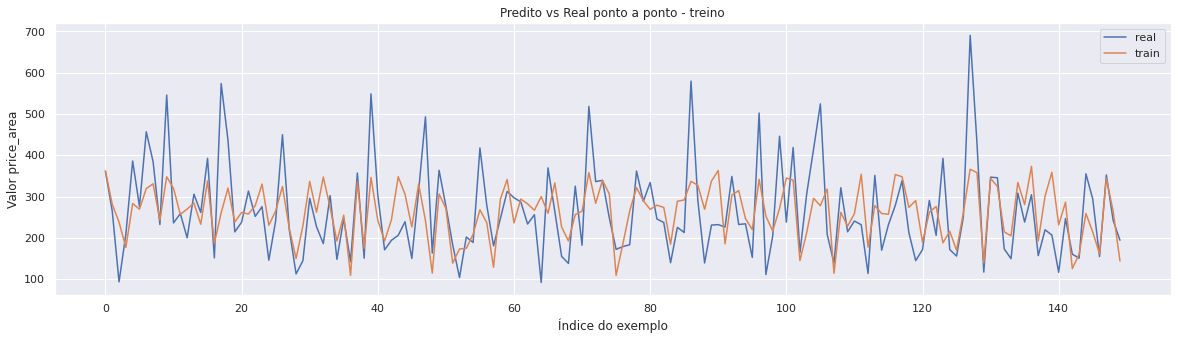

In [88]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
indices = list(range(len(y_pred)))
plt.figure(figsize=(20,5))
plt.plot(indices[0:150], y_train[0:150], label='real')
plt.plot(indices[0:150], y_pred[0:150], label='train')
plt.title('Predito vs Real ponto a ponto - treino')
plt.ylabel('Valor price_area')
plt.xlabel('Índice do exemplo')
plt.legend()
plt.show()

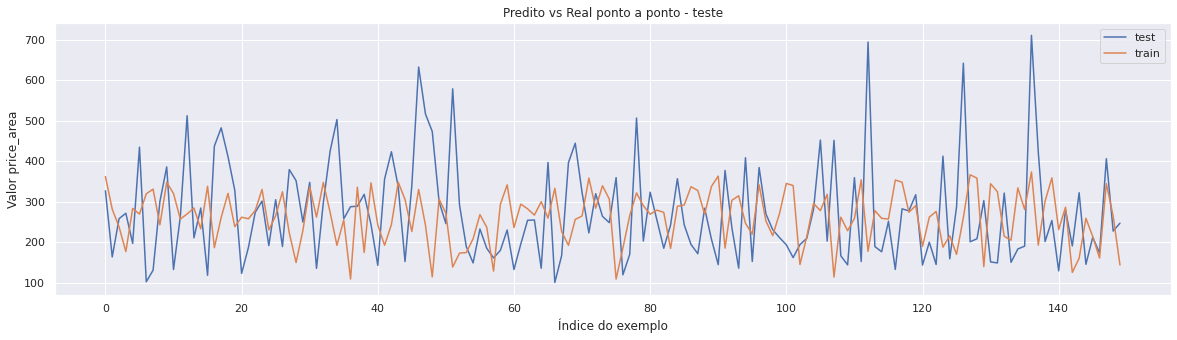

In [89]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
y_pred_test = model_lr.predict(X_test_rscaler)
indices = list(range(len(y_pred_test)))
plt.figure(figsize=(20,5))
plt.plot(indices[0:150], y_test[0:150], label='test')
plt.plot(indices[0:150], y_pred[0:150], label='train')
plt.title('Predito vs Real ponto a ponto - teste')
plt.ylabel('Valor price_area')
plt.xlabel('Índice do exemplo')
plt.legend()
plt.show()

Hipótese nula do teste de normalidade: a distribuição em questão é normal
p-value: 0.0


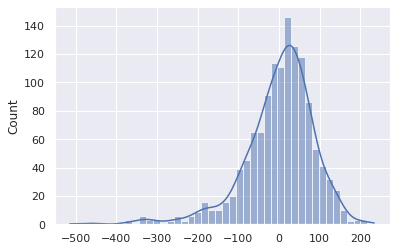

In [90]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
print('Hipótese nula do teste de normalidade: a distribuição em questão é normal')
print('p-value:', round(stats.normaltest(resid_train)[1],4))
sns.histplot(x=resid_train, kde=True)
plt.show()

p-value residuals: 0.0
p-value if normal: 0.3586


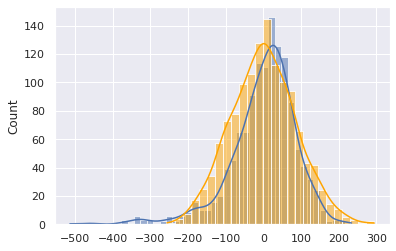

In [91]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
teorical_normal = np.random.normal(loc=np.mean(resid_train),scale=np.std(resid_train), size=resid_train.shape[0])
print('p-value residuals:', round(stats.normaltest(resid_train)[1],4))
print('p-value if normal:', round(stats.normaltest(teorical_normal)[1],4))
sns.histplot(resid_train, kde=True)
sns.histplot(teorical_normal, kde=True, color='orange')
plt.show()

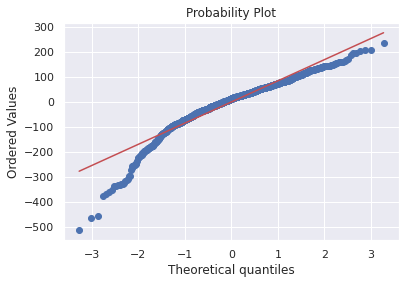

In [92]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
fig = plt.figure()
stats.probplot(resid_train, plot=plt)
plt.show()

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
### Conclusões
(10 min): com base em todas as análises realizadas escreva um texto descrevendo pelo menos 3 possíveis melhorias e porque acham que essas melhorias irão levar a um resultado melhor.
<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

In [93]:
# %load solucao4.3.3.py

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
- O modelo parece não estar estimando corretamente valores em extremos inferiores. Isso pode ser devido ao scalling ou por possuir uma não-linearidade não capturada pelo modelo
- Latitude e longitude estão impactando de forma significativa o modelo (olhando para os pesos). Contudo, lembramos do mapa que o lugar mais caro é o centro da cidade. Como é um modelo linear, latitudes acima do centro fazem com que o preço suba, quando deveria cair. Vou construir uma feature que é a distância para o centro.
- A partir de agora vou testar os efeitos, criando modelos implementando cada uma das ideias separadamente. Em resumo:
  - Substituir price_area por price_log. price_area eliminou a importância da área no modelo e não capturou a não linearidade do preço.
  - Calcular a distancia para o centro
  - Modificar o scaler para min_max (meu modelo precisa ajustar-se para os preços extremos)
  - Incluir as variáveis categóricas (provavelmente adotando binary_encoder para evitar uma matriz muito esparsa)

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
## Reiterando na modelagem

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

In [94]:
# %load solucao4.4.py
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

# guardar as informações do modelo atual para futura comparação
models_summary = []
summary = {'target:':'price_area',
           'features':features_names.to_list(),
           'scaler':'RobustScaler',
           'weights':weights.weight.to_list(),
           'intercept':intercept,
           'score_train':r2_train,
           'score_test':r2_test}
models_summary.append(summary)
models_summary

[{'target:': 'price_area',
  'features': ['size_house',
   'size_lot',
   'size_basement',
   'latitude',
   'longitude',
   'avg_size_neighbor_houses',
   'avg_size_neighbor_lot',
   'age'],
  'scaler': 'RobustScaler',
  'weights': [-24.268869841351723,
   -23.120367354903486,
   -2.9185589688693794,
   -1.8936986728981258,
   1.5457213456607946,
   42.19622390758117,
   43.749612676653996,
   70.71539976964687],
  'intercept': 265.1285427660651,
  'score_train': 0.36,
  'score_test': 0.34}]

In [95]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

def model_build(data, target, drops, scale_method = 'RobustScaler', seed=123, test_size=0.3, verbose=False):
    # feature selection
    df = data.copy()
    df.drop(cols_drop, axis=1, inplace=True)

    # pre-processing
    ## train/test split
    y = df[target].values
    Xs = df.drop(target, axis=1).values
    X_train, X_test, y_train, y_test = skms.train_test_split(Xs, y, random_state=seed, test_size=test_size)

    if scale_method == 'RobustScaler':
        scaler = skpp.RobustScaler()
    elif scale_method == 'MinMaxScaler':
        scaler = skpp.MinMaxScaler()
    elif scale_method =='StandardScaler':
        scaler = skpp.StandardScaler()
    elif scale_method == 'MaxAbsScaler':
        scaler = skpp.MaxAbsScaler()
        print(scale_method)
    
    scaler.fit(X_train)
    X_train_rscaled = scaler.transform(X_train)
    X_test_rscaled = scaler.transform(X_test)

    # modelling
    model_lr.fit(X_train_rscaled, y_train)
    y_pred = model_lr.predict(X_train_rscaled)
    features_names = df.drop(target, axis=1).columns
    weights = pd.DataFrame(model_lr.coef_,index=features_names, columns=['weight'])
    intercept = model_lr.intercept_
    y_test = model_lr.predict(X_test_rscaled)
    r2_train = round(model_lr.score(X_train_rscaled, y_train),2)
    r2_test = round(model_lr.score(X_test_rscaled, y_test),2)
    summary = {'target:':target,
               'features':features_names.to_list(),
               'scaler':scale_method,
               'weights':weights.weight.to_list(),
               'intercept':intercept,
               'score_train':r2_train,
               'score_test':r2_test}
    if verbose:
        print('Train:',summary['score_train'],'\n',
              'Test:',summary['score_test'])
        weights = weights.sort_values(by='weight')
        plt.figure(figsize=(15,5))
        plt.barh(weights.index,weights['weight'])
        for i, v in enumerate(weights['weight']):
            if v > 0:
                plt.text(v, i, " "+str(round(v,2)), color='blue', va='center')
            else:
                plt.text(0, i, " "+str(round(v,2)), color='blue', va='center')

    return summary

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
### Reiterando - price_long

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

Train: 0.74 
 Test: 1.0


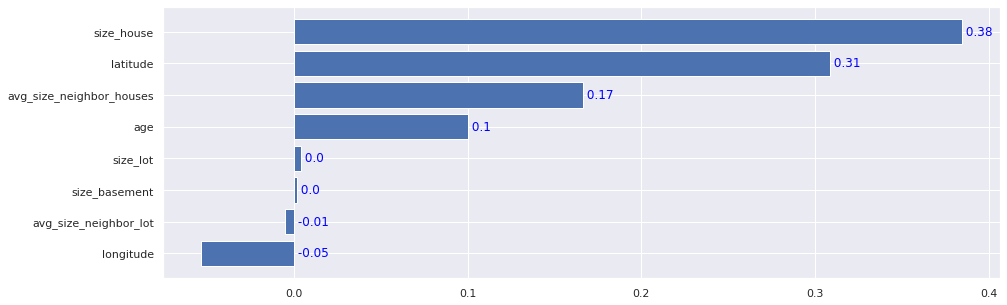

In [96]:
# %load solucao4.4.1.py
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
target = 'price_log'

categorical = ['num_bath','is_waterfront','num_bed','num_floors','condition','zip', 'zip_group']
year = ['year_built','renovation_date', 'years_since_renovation']
price = ['price', 'price_area']
cols_drop = categorical
cols_drop.extend(year)
cols_drop.extend(price)

summary = model_build(data=house_prices, target=target, drops=cols_drop, scale_method = 'RobustScaler', verbose=True)

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
### Reiterando - scalers

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

In [97]:
# %load solucao4.4.2.py
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
summary = model_build(data=house_prices, target=target, drops=cols_drop, scale_method = 'MinMaxScaler')
print('Train:',summary['score_train'],'\n'
      'Test:',summary['score_test'])

Train: 0.74 
Test: 1.0


In [98]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
target = 'price_log'

categorical = ['num_bath','is_waterfront','num_bed','num_floors','condition','zip', 'zip_group']
year = ['year_built','renovation_date', 'years_since_renovation']
price = ['price', 'price_area']
cols_drop = categorical
cols_drop.extend(year)
cols_drop.extend(price)
summary = model_build(data=house_prices, target=target, drops=cols_drop, scale_method = 'StandardScaler')
print('Train:',summary['score_train'],'\n'
      'Test:',summary['score_test'])

Train: 0.74 
Test: 1.0


<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

### Reiterando - lat/long central

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->

In [99]:
# %load solucao4.4.3.py
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

pd.cut(house_prices.latitude, 10).value_counts()

(47.66, 47.718]     304
(47.542, 47.601]    295
(47.484, 47.542]    258
(47.601, 47.66]     246
(47.718, 47.777]    217
(47.307, 47.366]    153
(47.425, 47.484]    150
(47.366, 47.425]    119
(47.249, 47.307]     86
(47.189, 47.249]     17
Name: latitude, dtype: int64

In [100]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

pd.cut(house_prices.latitude, 10).value_counts().index[0]

Interval(47.66, 47.718, closed='right')

In [101]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

pd.cut(house_prices.latitude, 10).value_counts().index[0].right

47.718

In [102]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

print(pd.cut(house_prices.latitude, 10).value_counts().index[1].right - pd.cut(house_prices.latitude, 10).value_counts().index[1].left)
pd.cut(house_prices.latitude, 10).value_counts().index[2].right - pd.cut(house_prices.latitude, 10).value_counts().index[2].left

0.0589999999999975


0.05799999999999983

In [103]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

house_prices['lat_bins'] = pd.cut(house_prices.latitude, 10)
house_prices['long_bins'] = pd.cut(house_prices.longitude, 10)

In [104]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

bins = house_prices.pivot_table('price_area',index='lat_bins', columns='long_bins', aggfunc='mean').round(2)
reverse_index = sorted(bins.index,reverse=True)
bins = bins.loc[reverse_index,:]
bins

long_bins         (-122.516, -122.411]  (-122.411, -122.306]  \
lat_bins                                                       
(47.718, 47.777]                   NaN                265.19   
(47.66, 47.718]                    NaN                355.88   
(47.601, 47.66]                    NaN                418.47   
(47.542, 47.601]                361.44                312.66   
(47.484, 47.542]                286.29                246.13   
(47.425, 47.484]                217.82                244.69   
(47.366, 47.425]                294.21                157.50   
(47.307, 47.366]                292.86                174.52   
(47.249, 47.307]                   NaN                145.64   
(47.189, 47.249]                   NaN                   NaN   

long_bins         (-122.306, -122.202]  (-122.202, -122.098]  \
lat_bins                                                       
(47.718, 47.777]                245.82                251.90   
(47.66, 47.718]                 352.01                292.81   
(47.601, 47.66]                 453.78                307.21   
(47.542, 47.601]                319.71                302.15   
(47.484, 47.542]                228.36                213.49   
(47.425, 47.484]                183.72                177.69   
(47.366, 47.425]                154.11                155.56   
(47.307, 47.366]                151.52                160.10   
(47.249, 47.307]                154.21                155.69   
(47.189, 47.249]                   NaN                156.25   

long_bins         (-122.098, -121.994]  (-121.994, -121.89]  \
lat_bins                                                      
(47.718, 47.777]                238.01               204.15   
(47.66, 47.718]                 288.93               191.02   
(47.601, 47.66]                 271.10               250.47   
(47.542, 47.601]                282.46               248.03   
(47.484, 47.542]                241.28               282.57   
(47.425, 47.484]                201.97               221.09   
(47.366, 47.425]                171.20               248.57   
(47.307, 47.366]                165.89               191.42   
(47.249, 47.307]                141.93                  NaN   
(47.189, 47.249]                176.32               194.59   

long_bins         (-121.89, -121.786]  (-121.786, -121.681]  \
lat_bins                                                      
(47.718, 47.777]               406.74                   NaN   
(47.66, 47.718]                   NaN                   NaN   
(47.601, 47.66]                153.52                   NaN   
(47.542, 47.601]               234.34                   NaN   
(47.484, 47.542]               209.64                225.25   
(47.425, 47.484]               184.86                230.86   
(47.366, 47.425]                  NaN                   NaN   
(47.307, 47.366]                  NaN                   NaN   
(47.249, 47.307]                  NaN                   NaN   
(47.189, 47.249]                  NaN                   NaN   

long_bins         (-121.577, -121.473]  
lat_bins                                
(47.718, 47.777]                166.67  
(47.66, 47.718]                    NaN  
(47.601, 47.66]                    NaN  
(47.542, 47.601]                   NaN  
(47.484, 47.542]                   NaN  
(47.425, 47.484]                   NaN  
(47.366, 47.425]                   NaN  
(47.307, 47.366]                   NaN  
(47.249, 47.307]                   NaN  
(47.189, 47.249]                   NaN

<AxesSubplot:xlabel='long_bins', ylabel='lat_bins'>

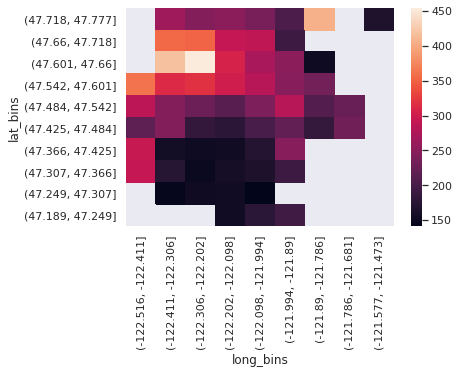

In [105]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

sns.heatmap(bins)

In [106]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

bins = bins.stack().reset_index().sort_values(by=0, ascending=False)
bins.head()

lat_bins             long_bins       0
13   (47.601, 47.66]  (-122.306, -122.202]  453.78
12   (47.601, 47.66]  (-122.411, -122.306]  418.47
5   (47.718, 47.777]   (-121.89, -121.786]  406.74
18  (47.542, 47.601]  (-122.516, -122.411]  361.44
7    (47.66, 47.718]  (-122.411, -122.306]  355.88

In [107]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

lat_mean = (bins.loc[bins.index == 43,['lat_bins']].values[0][0].left + bins.loc[bins.index == 43,['lat_bins']].values[0][0].right)/2
long_mean = (bins.loc[bins.index == 43,['long_bins']].values[0][0].left + bins.loc[bins.index == 43,['long_bins']].values[0][0].right)/2
print(lat_mean, long_mean)

47.3955 -122.25399999999999


<AxesSubplot:>

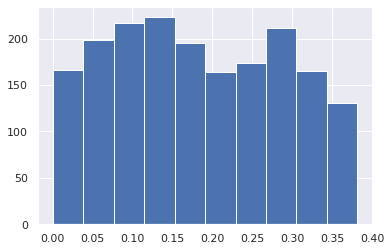

In [108]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

house_prices['lat_dif'] = abs(house_prices['latitude'] - lat_mean)
house_prices['long_dif'] = abs(house_prices['longitude'] - long_mean)
house_prices['lat_dif'].hist()

Train: 0.71 
 Test: 1.0


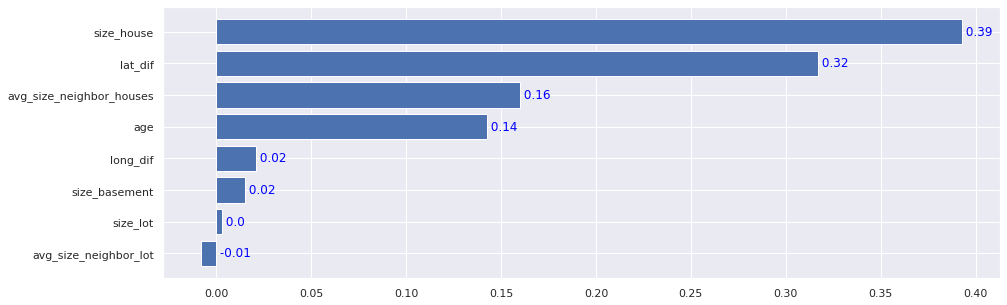

In [109]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

target = 'price_log'

categorical = ['num_bath','is_waterfront','num_bed','num_floors','condition','zip', 'zip_group']
year = ['year_built','renovation_date', 'years_since_renovation']
price = ['price', 'price_area']
lat_long = ['latitude', 'longitude', 'lat_bins', 'long_bins']
cols_drop = categorical
cols_drop.extend(year)
cols_drop.extend(price)
cols_drop.extend(lat_long)
summary = model_build(data=house_prices, target=target, drops=cols_drop, scale_method = 'RobustScaler', verbose=True)

In [110]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

# Estou satisfeito com esse teste. Mas minha função anterior não entrega como output vários dados importantes, tais como os resíduos.
# Contudo, não quero que a função consuma memória desnecessária gerando esses valores sempre. 
# Vou incluir um novo argumento ('result_full') para devolver o resultado completo ou não.

def model_build(data, target, drops, scale_method = 'RobustScaler', seed=123, test_size=0.3, verbose=False, result_full=False):
    # feature selection
    df = data.copy()
    df.drop(cols_drop, axis=1, inplace=True)

    # pre-processing
    ## train/test split
    y = df[target].values
    Xs = df.drop(target, axis=1).values
    X_train, X_test, y_train, y_test = skms.train_test_split(Xs, y, random_state=seed, test_size=test_size)

    if scale_method == 'RobustScaler':
        scaler = skpp.RobustScaler()
    elif scale_method == 'MinMaxScaler':
        scaler = skpp.MinMaxScaler()
    elif scale_method =='StandardScaler':
        scaler = skpp.StandardScaler()
    elif scale_method == 'MaxAbsScaler':
        scaler = skpp.MaxAbsScaler()
        print(scale_method)
    
    scaler.fit(X_train)
    X_train_rscaled = scaler.transform(X_train)
    X_test_rscaled = scaler.transform(X_test)

    # modelling
    model_lr.fit(X_train_rscaled, y_train)
    features_names = df.drop(target, axis=1).columns
    weights = pd.DataFrame(model_lr.coef_,index=features_names, columns=['weight'])
    intercept = model_lr.intercept_
    r2_train = round(model_lr.score(X_train_rscaled, y_train),2)
    r2_test = round(model_lr.score(X_test_rscaled, y_test),2)

    if result_full:
        y_pred_train = model_lr.predict(X_train_rscaled)
        y_pred_test = model_lr.predict(X_test_rscaled)
        summary = {'target:':target,
                   'features':features_names.to_list(),
                   'scaler':scale_method,
                   'weights':weights.weight.to_list(),
                   'intercept':intercept,
                   'score_train':r2_train,
                   'score_test':r2_test,
                   'y_train':y_train,
                   'y_test':y_test,
                   'y_pred_train':y_pred,
                   'y_pred_test':y_pred_test}
    else:
        summary = {'target:':target,
                   'features':features_names.to_list(),
                   'scaler':scale_method,
                   'weights':weights.weight.to_list(),
                   'intercept':intercept,
                   'score_train':r2_train,
                   'score_test':r2_test}

    if verbose:
        print('Train:',summary['score_train'],'\n',
              'Test:',summary['score_test'])
        weights = weights.sort_values(by='weight')
        plt.figure(figsize=(15,5))
        plt.barh(weights.index,weights['weight'])
        for i, v in enumerate(weights['weight']):
            if v > 0:
                plt.text(v, i, " "+str(round(v,2)), color='blue', va='center')
            else:
                plt.text(0, i, " "+str(round(v,2)), color='blue', va='center')

    return summary

In [111]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
summary = model_build(data=house_prices, target=target, drops=cols_drop, scale_method = 'RobustScaler', result_full=True)

In [112]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##
summary.keys()

dict_keys(['target:', 'features', 'scaler', 'weights', 'intercept', 'score_train', 'score_test', 'y_train', 'y_test', 'y_pred_train', 'y_pred_test'])

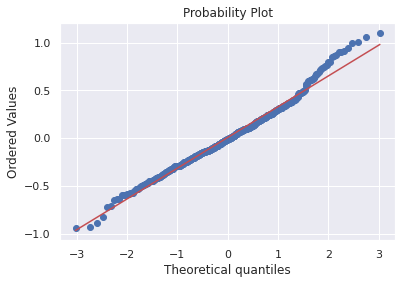

In [113]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

y_test = summary['y_test']
y_pred_test = summary['y_pred_test']
resid_test = y_test - y_pred_test

fig = plt.figure()
stats.probplot(resid_test, plot=plt)
plt.show()

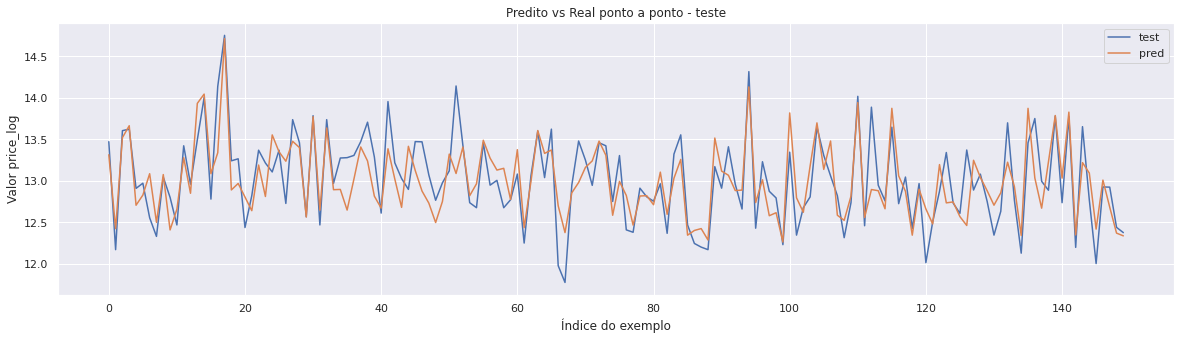

In [114]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

indices = list(range(len(y_pred_test)))
plt.figure(figsize=(20,5))
plt.plot(indices[0:150], y_test[0:150], label='test')
plt.plot(indices[0:150], y_pred_test[0:150], label='pred')
plt.title('Predito vs Real ponto a ponto - teste')
plt.ylabel('Valor price_log')
plt.xlabel('Índice do exemplo')
plt.legend()
plt.show()

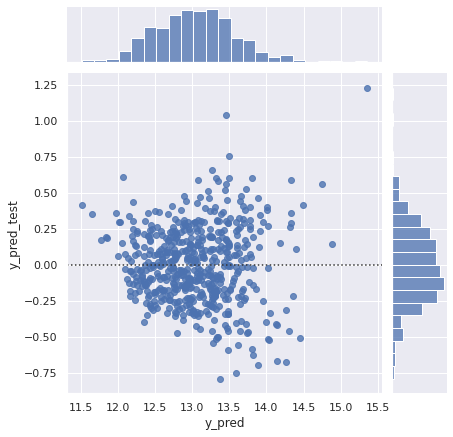

In [115]:
## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##

sns.jointplot(x=y_test, y=y_pred_test, kind='resid').set_axis_labels("");
plt.xlabel('y_pred')
plt.ylabel('y_pred_test')
plt.show()

<!---## ----------------------------- ##
## ---- dividir celula aqui ---- ##
## ----------------------------- ##-->
# Possiveis exercicios para casa

1) Testar a inclusão das variáveis categóricas
2) Calcular outras métricas. Por exemplo, RMSE e verificar como ela melhora entre as versões. Eventualmente, pode ser um output da função